In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_Commercial_NetPosition_to_openinterest_change',
                    'forward_CommercialLongPosition_to_openinterest_change',
                    'forward_CommercialShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("wti_cot_comm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_Commercial_NetPosition_change': ['prior_5D_AGG_OI_change',
  'F3_RolledPrice_rolling_20D_volatility',
  'F1_RolledPrice_change'],
 'forward_report_CommercialLongPosition_change': ['prior_report_CommercialShortPosition_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1MinusF2_openinterest_change'],
 'forward_report_CommercialShortPosition_change': ['prior_report_CommercialShortPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change'],
 'forward_Commercial_NetPosition_to_openinterest_change': ['F1_RolledPrice_change',
  'F2_RolledPrice_rolling_20D_volatility',
  'prior_5D_F1_OI_change'],
 'forward_CommercialLongPosition_to_openinterest_change': ['F2_RolledPrice_rolling_20D_volatility',
  'prior_report_CommercialLongPosition_change',
  'prior_report_CommercialShor

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 12:35:14,134] A new study created in memory with name: no-name-3e2f6e83-2847-4c58-a750-cc703eecde1a
Best trial: 1. Best value: 0.0634949:   1%|      | 1/80 [00:01<01:45,  1.33s/it]

[I 2025-08-20 12:35:15,475] Trial 0 finished with value: 0.06347528690238657 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.06347528690238657.
[I 2025-08-20 12:35:15,505] Trial 1 finished with value: 0.06349490930875144 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.06349490930875144.


Best trial: 2. Best value: 0.0852873:   4%|▏     | 3/80 [00:04<01:59,  1.56s/it]

[I 2025-08-20 12:35:18,742] Trial 2 finished with value: 0.08528726270046308 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.08528726270046308.


Best trial: 2. Best value: 0.0852873:  10%|▌     | 8/80 [00:04<00:27,  2.58it/s]

[I 2025-08-20 12:35:18,964] Trial 3 finished with value: 0.0725145044264083 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.08528726270046308.
[I 2025-08-20 12:35:18,995] Trial 4 finished with value: 0.06349429990467384 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.08528726270046308.
[I 2025-08-20 12:35:19,025] Trial 5 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.08528726270046308.
[I 2025-08-20 12:35:19,055] Trial 6 finished with value: -0.09644152186702028 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.08528726270046308.
[I 2025-08-20 12:35:19,084] Trial 7 finished with value: 0.06349490987800953 

Best trial: 8. Best value: 0.0852982:  12%|▋    | 10/80 [00:05<00:21,  3.27it/s]

[I 2025-08-20 12:35:19,322] Trial 8 finished with value: 0.0852981578628954 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.0852981578628954.
[I 2025-08-20 12:35:19,350] Trial 9 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.0852981578628954.
[I 2025-08-20 12:35:19,494] Trial 10 finished with value: 0.02125753351402639 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 8 with value: 0.0852981578628954.


Best trial: 11. Best value: 0.0854398:  15%|▌   | 12/80 [00:08<00:49,  1.38it/s]

[I 2025-08-20 12:35:22,610] Trial 11 finished with value: 0.08543980761578618 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 11 with value: 0.08543980761578618.


Best trial: 11. Best value: 0.0854398:  16%|▋   | 13/80 [00:09<00:52,  1.27it/s]

[I 2025-08-20 12:35:23,685] Trial 12 finished with value: 0.03399972237596406 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.08543980761578618.


Best trial: 11. Best value: 0.0854398:  18%|▋   | 14/80 [00:17<02:29,  2.26s/it]

[I 2025-08-20 12:35:31,554] Trial 13 finished with value: 0.06850113345881936 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 11 with value: 0.08543980761578618.


Best trial: 14. Best value: 0.0860093:  19%|▊   | 15/80 [00:22<03:08,  2.90s/it]

[I 2025-08-20 12:35:36,625] Trial 14 finished with value: 0.08600934864249565 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.08600934864249565.


Best trial: 15. Best value: 0.0861047:  20%|▊   | 16/80 [00:27<03:40,  3.44s/it]

[I 2025-08-20 12:35:41,726] Trial 15 finished with value: 0.08610471393072736 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.08610471393072736.


Best trial: 16. Best value: 0.0863691:  21%|▊   | 17/80 [00:33<04:17,  4.09s/it]

[I 2025-08-20 12:35:47,660] Trial 16 finished with value: 0.08636911599837184 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  22%|▉   | 18/80 [00:38<04:30,  4.36s/it]

[I 2025-08-20 12:35:52,747] Trial 17 finished with value: 0.08589163098315995 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.
[I 2025-08-20 12:35:52,790] Trial 18 finished with value: 0.06349490983444597 and parameters: {'model': 'lasso', 'alpha': 2.928274215629577e-06}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  25%|█   | 20/80 [00:41<03:08,  3.15s/it]

[I 2025-08-20 12:35:55,905] Trial 19 finished with value: 0.06273923538630359 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.08636911599837184.
[I 2025-08-20 12:35:55,951] Trial 20 finished with value: 0.06293582170510947 and parameters: {'model': 'enet', 'alpha': 1.3723347259313015e-06, 'l1_ratio': 0.9826861567778047, 'loss': 'squared_error'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  28%|█   | 22/80 [00:46<02:48,  2.91s/it]

[I 2025-08-20 12:36:00,965] Trial 21 finished with value: 0.08600934864249563 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 16. Best value: 0.0863691:  29%|█▏  | 23/80 [00:51<03:11,  3.36s/it]

[I 2025-08-20 12:36:05,982] Trial 22 finished with value: 0.08548490852954689 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 16 with value: 0.08636911599837184.


Best trial: 23. Best value: 0.0867845:  30%|█▏  | 24/80 [00:57<03:35,  3.85s/it]

[I 2025-08-20 12:36:11,419] Trial 23 finished with value: 0.08678448985250103 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 23 with value: 0.08678448985250103.


Best trial: 24. Best value: 0.0871759:  31%|█▎  | 25/80 [01:01<03:36,  3.94s/it]

[I 2025-08-20 12:36:15,614] Trial 24 finished with value: 0.08717590964903425 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  32%|█▎  | 26/80 [01:05<03:38,  4.05s/it]

[I 2025-08-20 12:36:19,976] Trial 25 finished with value: 0.08619145256158518 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  34%|█▎  | 27/80 [01:09<03:34,  4.05s/it]

[I 2025-08-20 12:36:24,040] Trial 26 finished with value: 0.08717167424033742 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  35%|█▍  | 28/80 [01:14<03:34,  4.12s/it]

[I 2025-08-20 12:36:28,343] Trial 27 finished with value: 0.08717167424033742 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  38%|█▌  | 30/80 [01:16<02:57,  3.55s/it]

[I 2025-08-20 12:36:30,456] Trial 28 finished with value: 0.04772683643432387 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 12:36:30,486] Trial 29 finished with value: 0.06343299956658717 and parameters: {'model': 'lasso', 'alpha': 3.639727217734563}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 12:36:30,520] Trial 30 finished with value: 0.06292124440571016 and parameters: {'model': 'enet', 'alpha': 0.00033218900439702846, 'l1_ratio': 0.0575329574350022, 'loss': 'squared_error'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  40%|█▌  | 32/80 [01:20<01:53,  2.35s/it]

[I 2025-08-20 12:36:34,608] Trial 31 finished with value: 0.0871716742403374 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 12:36:34,642] Trial 32 finished with value: 0.054477939970915386 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  42%|█▋  | 34/80 [01:24<01:44,  2.27s/it]

[I 2025-08-20 12:36:38,852] Trial 33 finished with value: 0.08616201896628446 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  44%|█▊  | 35/80 [01:27<01:49,  2.43s/it]

[I 2025-08-20 12:36:41,930] Trial 34 finished with value: 0.08543993575836818 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  46%|█▊  | 37/80 [01:31<01:59,  2.79s/it]

[I 2025-08-20 12:36:45,968] Trial 35 finished with value: 0.08616066220432791 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 12:36:46,002] Trial 36 finished with value: 0.05651844384873653 and parameters: {'model': 'ridge', 'alpha': 407.46064575978403}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 12:36:46,033] Trial 37 finished with value: 0.0634949003197229 and parameters: {'model': 'lasso', 'alpha': 0.0005693946731955147}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  49%|█▉  | 39/80 [01:35<01:25,  2.10s/it]

[I 2025-08-20 12:36:50,065] Trial 38 finished with value: 0.08622063871604976 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  50%|██  | 40/80 [01:38<01:30,  2.26s/it]

[I 2025-08-20 12:36:53,008] Trial 39 finished with value: 0.08219615734125693 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014923557799196574, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.9873907080700226, 'max_leaf_nodes': 247}. Best is trial 24 with value: 0.08717590964903425.
[I 2025-08-20 12:36:53,037] Trial 40 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  52%|██  | 42/80 [01:43<01:24,  2.21s/it]

[I 2025-08-20 12:36:57,280] Trial 41 finished with value: 0.08717167424033738 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  54%|██▏ | 43/80 [01:47<01:37,  2.62s/it]

[I 2025-08-20 12:37:01,539] Trial 42 finished with value: 0.08645216395810007 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  55%|██▏ | 44/80 [01:50<01:38,  2.74s/it]

[I 2025-08-20 12:37:04,704] Trial 43 finished with value: 0.08425383388999426 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 24. Best value: 0.0871759:  56%|██▎ | 45/80 [01:54<01:46,  3.04s/it]

[I 2025-08-20 12:37:08,698] Trial 44 finished with value: 0.08622063871604976 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 24 with value: 0.08717590964903425.


Best trial: 45. Best value: 0.0884365:  57%|██▎ | 46/80 [01:55<01:27,  2.56s/it]

[I 2025-08-20 12:37:09,856] Trial 45 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.08843651346308237.
[I 2025-08-20 12:37:09,898] Trial 46 finished with value: 0.06345614514340797 and parameters: {'model': 'ridge', 'alpha': 3.033058074284432}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 45. Best value: 0.0884365:  61%|██▍ | 49/80 [01:56<00:51,  1.65s/it]

[I 2025-08-20 12:37:10,658] Trial 47 finished with value: 0.054322176859610695 and parameters: {'model': 'hgbm', 'learning_rate': 0.28566765010964656, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.5497683700838181, 'max_leaf_nodes': 252}. Best is trial 45 with value: 0.08843651346308237.
[I 2025-08-20 12:37:10,691] Trial 48 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.08843651346308237.
[I 2025-08-20 12:37:10,726] Trial 49 finished with value: 0.08047006333898728 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'huber', 'epsilon': 0.19473738998246617}. Best is trial 45 with value: 0.08843651346308237.


Best trial: 50. Best value: 0.0884365:  64%|██▌ | 51/80 [01:57<00:30,  1.05s/it]

[I 2025-08-20 12:37:11,852] Trial 50 finished with value: 0.0884365134630824 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.0884365134630824.


Best trial: 50. Best value: 0.0884365:  65%|██▌ | 52/80 [01:58<00:30,  1.08s/it]

[I 2025-08-20 12:37:13,020] Trial 51 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.0884365134630824.


Best trial: 52. Best value: 0.0884437:  66%|██▋ | 53/80 [02:00<00:29,  1.09s/it]

[I 2025-08-20 12:37:14,165] Trial 52 finished with value: 0.08844368027937737 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  68%|██▋ | 54/80 [02:01<00:28,  1.10s/it]

[I 2025-08-20 12:37:15,310] Trial 53 finished with value: 0.0863499176316663 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  69%|██▊ | 55/80 [02:02<00:27,  1.12s/it]

[I 2025-08-20 12:37:16,480] Trial 54 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  70%|██▊ | 56/80 [02:02<00:23,  1.01it/s]

[I 2025-08-20 12:37:17,091] Trial 55 finished with value: 0.040071863462331145 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  71%|██▊ | 57/80 [02:04<00:23,  1.02s/it]

[I 2025-08-20 12:37:18,216] Trial 56 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  72%|██▉ | 58/80 [02:05<00:23,  1.07s/it]

[I 2025-08-20 12:37:19,405] Trial 57 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  74%|██▉ | 59/80 [02:07<00:29,  1.40s/it]

[I 2025-08-20 12:37:21,622] Trial 58 finished with value: 0.08509497427832485 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.
[I 2025-08-20 12:37:21,654] Trial 59 finished with value: 0.06349222736873349 and parameters: {'model': 'lasso', 'alpha': 0.1591499576109169}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  76%|███ | 61/80 [02:09<00:23,  1.26s/it]

[I 2025-08-20 12:37:23,814] Trial 60 finished with value: 0.08507792485236329 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  78%|███ | 62/80 [02:10<00:22,  1.24s/it]

[I 2025-08-20 12:37:24,968] Trial 61 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  79%|███▏| 63/80 [02:11<00:20,  1.21s/it]

[I 2025-08-20 12:37:26,115] Trial 62 finished with value: 0.0884365134630824 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  80%|███▏| 64/80 [02:13<00:19,  1.19s/it]

[I 2025-08-20 12:37:27,236] Trial 63 finished with value: 0.08636783573494693 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  81%|███▎| 65/80 [02:14<00:17,  1.19s/it]

[I 2025-08-20 12:37:28,422] Trial 64 finished with value: 0.08841669121179783 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  82%|███▎| 66/80 [02:16<00:21,  1.50s/it]

[I 2025-08-20 12:37:30,725] Trial 65 finished with value: 0.08508241764346058 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  84%|███▎| 67/80 [02:17<00:17,  1.32s/it]

[I 2025-08-20 12:37:31,601] Trial 66 finished with value: 0.08512720964648196 and parameters: {'model': 'hgbm', 'learning_rate': 0.01077597597882998, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.9844344599741437, 'max_leaf_nodes': 185}. Best is trial 52 with value: 0.08844368027937737.
[I 2025-08-20 12:37:31,633] Trial 67 finished with value: 0.06349490987800953 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  86%|███▍| 69/80 [02:18<00:11,  1.01s/it]

[I 2025-08-20 12:37:32,843] Trial 68 finished with value: 0.08598768502434016 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.
[I 2025-08-20 12:37:32,887] Trial 69 finished with value: 0.07867192858857683 and parameters: {'model': 'enet', 'alpha': 0.0017975959987044563, 'l1_ratio': 0.5888900372404716, 'loss': 'huber', 'epsilon': 0.15536194997124084}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  89%|███▌| 71/80 [02:19<00:06,  1.35it/s]

[I 2025-08-20 12:37:33,496] Trial 70 finished with value: 0.026247818858819803 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  90%|███▌| 72/80 [02:20<00:06,  1.21it/s]

[I 2025-08-20 12:37:34,642] Trial 71 finished with value: 0.08843651346308237 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  91%|███▋| 73/80 [02:21<00:06,  1.10it/s]

[I 2025-08-20 12:37:35,826] Trial 72 finished with value: 0.08843651346308234 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  92%|███▋| 74/80 [02:23<00:07,  1.25s/it]

[I 2025-08-20 12:37:38,057] Trial 73 finished with value: 0.08508567372636859 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  94%|███▊| 75/80 [02:25<00:06,  1.21s/it]

[I 2025-08-20 12:37:39,164] Trial 74 finished with value: 0.08841669121179783 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  95%|███▊| 76/80 [02:26<00:04,  1.20s/it]

[I 2025-08-20 12:37:40,323] Trial 75 finished with value: 0.08633485679806094 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  96%|███▊| 77/80 [02:28<00:04,  1.63s/it]

[I 2025-08-20 12:37:43,047] Trial 76 finished with value: 0.06541034759598781 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.
[I 2025-08-20 12:37:43,078] Trial 77 finished with value: 0.06264740483930588 and parameters: {'model': 'ridge', 'alpha': 61.64499086329359}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437:  99%|███▉| 79/80 [02:30<00:01,  1.17s/it]

[I 2025-08-20 12:37:44,233] Trial 78 finished with value: 0.08842979985604715 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.


Best trial: 52. Best value: 0.0884437: 100%|████| 80/80 [02:31<00:00,  1.89s/it]
[I 2025-08-20 12:37:45,426] A new study created in memory with name: no-name-ca428fdb-954f-48da-8fba-e82c38df3eb8


[I 2025-08-20 12:37:45,419] Trial 79 finished with value: 0.0884365134630824 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.08844368027937737.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.0634, params={'model': 'lasso', 'alpha': 3.639727217734563}
ridge: score=0.0545, params={'model': 'ridge', 'alpha': 509.2222138472398}
rf: score=0.0654, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
hgbm: score=0.0213, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
ols: score=0.0635, params={'model': 'ols'}
enet: score=-0.0964, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss

Best trial: 0. Best value: 0.305643:   1%|       | 1/80 [00:00<00:05, 14.39it/s]

[I 2025-08-20 12:37:45,466] Trial 0 finished with value: 0.3056427068668385 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.3056427068668385.
[I 2025-08-20 12:37:45,495] Trial 1 finished with value: 0.3056348940746919 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.3056427068668385.


Best trial: 2. Best value: 0.41907:   4%|▎       | 3/80 [00:03<01:34,  1.22s/it]

[I 2025-08-20 12:37:49,093] Trial 2 finished with value: 0.4190701227026162 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:   9%|▋       | 7/80 [00:04<00:29,  2.47it/s]

[I 2025-08-20 12:37:49,352] Trial 3 finished with value: 0.35299420110714064 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 12:37:49,383] Trial 4 finished with value: 0.3056432953012419 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 12:37:49,422] Trial 5 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 12:37:49,466] Trial 6 finished with value: 0.3004474942079814 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 12:37:49,496] Trial 7 finished with value: 0.3056348861942815 and para

Best trial: 2. Best value: 0.41907:  11%|▉       | 9/80 [00:04<00:23,  3.09it/s]

[I 2025-08-20 12:37:49,822] Trial 8 finished with value: 0.386856412552214 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.4190701227026162.
[I 2025-08-20 12:37:49,850] Trial 9 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:  14%|▉      | 11/80 [00:08<00:57,  1.20it/s]

[I 2025-08-20 12:37:53,507] Trial 10 finished with value: 0.41905993560334565 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:  15%|█      | 12/80 [00:11<01:32,  1.36s/it]

[I 2025-08-20 12:37:57,035] Trial 11 finished with value: 0.41905993560334565 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 2. Best value: 0.41907:  16%|█▏     | 13/80 [00:15<02:02,  1.83s/it]

[I 2025-08-20 12:38:00,580] Trial 12 finished with value: 0.41905993560334565 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.4190701227026162.


Best trial: 13. Best value: 0.428348:  18%|▉    | 14/80 [00:17<02:01,  1.84s/it]

[I 2025-08-20 12:38:02,458] Trial 13 finished with value: 0.4283476100418607 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.4283476100418607.


Best trial: 14. Best value: 0.429086:  19%|▉    | 15/80 [00:20<02:33,  2.37s/it]

[I 2025-08-20 12:38:06,374] Trial 14 finished with value: 0.42908555544741306 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 14. Best value: 0.429086:  20%|█    | 16/80 [00:25<03:02,  2.85s/it]

[I 2025-08-20 12:38:10,567] Trial 15 finished with value: 0.4238939386117123 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 14. Best value: 0.429086:  21%|█    | 17/80 [00:29<03:18,  3.15s/it]

[I 2025-08-20 12:38:14,507] Trial 16 finished with value: 0.4290204220066225 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 14. Best value: 0.429086:  22%|█▏   | 18/80 [00:33<03:31,  3.41s/it]

[I 2025-08-20 12:38:18,580] Trial 17 finished with value: 0.4277361844695305 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.42908555544741306.


Best trial: 18. Best value: 0.430374:  24%|█▏   | 19/80 [00:36<03:23,  3.33s/it]

[I 2025-08-20 12:38:21,718] Trial 18 finished with value: 0.4303741217423819 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.4303741217423819.


Best trial: 18. Best value: 0.430374:  25%|█▎   | 20/80 [00:39<03:18,  3.31s/it]

[I 2025-08-20 12:38:24,979] Trial 19 finished with value: 0.4288906236779904 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.4303741217423819.
[I 2025-08-20 12:38:25,029] Trial 20 finished with value: 0.30563488625103347 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 18 with value: 0.4303741217423819.


Best trial: 18. Best value: 0.430374:  28%|█▍   | 22/80 [00:43<02:30,  2.59s/it]

[I 2025-08-20 12:38:28,426] Trial 21 finished with value: 0.42889637647113854 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 18 with value: 0.4303741217423819.


Best trial: 22. Best value: 0.430706:  29%|█▍   | 23/80 [00:43<02:01,  2.13s/it]

[I 2025-08-20 12:38:29,148] Trial 22 finished with value: 0.4307056108742051 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  30%|█▌   | 24/80 [00:44<01:39,  1.77s/it]

[I 2025-08-20 12:38:29,879] Trial 23 finished with value: 0.43070561087420506 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:38:29,924] Trial 24 finished with value: 0.3070635517022291 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  32%|█▋   | 26/80 [00:45<01:03,  1.18s/it]

[I 2025-08-20 12:38:30,649] Trial 25 finished with value: 0.42736791628293863 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  34%|█▋   | 27/80 [00:45<00:56,  1.06s/it]

[I 2025-08-20 12:38:31,302] Trial 26 finished with value: 0.3789122243202199 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  35%|█▊   | 28/80 [00:47<00:57,  1.11s/it]

[I 2025-08-20 12:38:32,554] Trial 27 finished with value: 0.4265100173619096 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  36%|█▊   | 29/80 [00:47<00:52,  1.03s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 12:38:33,368] Trial 28 finished with value: 0.42435208823099735 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:38:33,412] Trial 29 finished with value: 0.3056840859076416 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 22 with value: 0.4307056108742051.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 12:38:33,956] Trial 30 finished with value: 0.30188610246043474 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  40%|██   | 32/80 [00:51<01:02,  1.30s/it]

[I 2025-08-20 12:38:37,154] Trial 31 finished with value: 0.43018268125695563 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:38:37,187] Trial 32 finished with value: 0.30585049416913257 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  42%|██▏  | 34/80 [00:54<01:05,  1.42s/it]

[I 2025-08-20 12:38:40,350] Trial 33 finished with value: 0.43019311677609534 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  44%|██▏  | 35/80 [00:58<01:26,  1.92s/it]

[I 2025-08-20 12:38:44,009] Trial 34 finished with value: 0.3876502246600277 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  46%|██▎  | 37/80 [01:01<01:27,  2.04s/it]

[I 2025-08-20 12:38:46,454] Trial 35 finished with value: 0.42430452806944385 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:38:46,496] Trial 36 finished with value: 0.30461151561753397 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:38:46,552] Trial 37 finished with value: 0.30563489768651353 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  49%|██▍  | 39/80 [01:02<00:51,  1.25s/it]

[I 2025-08-20 12:38:47,876] Trial 38 finished with value: 0.42726354133405775 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  50%|██▌  | 40/80 [01:05<01:00,  1.52s/it]

[I 2025-08-20 12:38:50,512] Trial 39 finished with value: 0.4016928490393972 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:38:50,543] Trial 40 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  52%|██▋  | 42/80 [01:08<00:59,  1.56s/it]

[I 2025-08-20 12:38:53,761] Trial 41 finished with value: 0.43019311677609534 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  54%|██▋  | 43/80 [01:10<01:04,  1.75s/it]

[I 2025-08-20 12:38:56,287] Trial 42 finished with value: 0.42787289017899643 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  55%|██▊  | 44/80 [01:14<01:15,  2.09s/it]

[I 2025-08-20 12:38:59,549] Trial 43 finished with value: 0.43019311677609523 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  56%|██▊  | 45/80 [01:16<01:18,  2.23s/it]

[I 2025-08-20 12:39:02,199] Trial 44 finished with value: 0.4289038372909784 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  57%|██▉  | 46/80 [01:17<01:06,  1.96s/it]

[I 2025-08-20 12:39:03,392] Trial 45 finished with value: 0.4172851588047514 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  62%|███▏ | 50/80 [01:24<00:44,  1.47s/it]

[I 2025-08-20 12:39:09,704] Trial 46 finished with value: 0.4150503620543452 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:39:09,734] Trial 47 finished with value: 0.30643479301516746 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:39:09,765] Trial 48 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:39:09,811] Trial 49 finished with value: 0.30706355426449344 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  64%|███▏ | 51/80 [01:25<00:38,  1.32s/it]

[I 2025-08-20 12:39:10,508] Trial 50 finished with value: 0.42643669034523946 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  65%|███▎ | 52/80 [01:28<00:48,  1.73s/it]

[I 2025-08-20 12:39:13,659] Trial 51 finished with value: 0.43019311677609523 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  66%|███▎ | 53/80 [01:31<00:55,  2.07s/it]

[I 2025-08-20 12:39:16,802] Trial 52 finished with value: 0.43018268125695563 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  68%|███▍ | 54/80 [01:34<00:57,  2.22s/it]

[I 2025-08-20 12:39:19,427] Trial 53 finished with value: 0.4291007323904367 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  69%|███▍ | 55/80 [01:37<01:00,  2.43s/it]

[I 2025-08-20 12:39:22,455] Trial 54 finished with value: 0.42783905816262685 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  70%|███▌ | 56/80 [01:39<01:00,  2.54s/it]

[I 2025-08-20 12:39:25,275] Trial 55 finished with value: 0.4087663861318913 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  71%|███▌ | 57/80 [01:41<00:53,  2.32s/it]

[I 2025-08-20 12:39:27,053] Trial 56 finished with value: 0.3073264293423352 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  72%|███▋ | 58/80 [01:47<01:13,  3.34s/it]

[I 2025-08-20 12:39:32,886] Trial 57 finished with value: 0.40244259485876127 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  74%|███▋ | 59/80 [01:48<00:58,  2.77s/it]

[I 2025-08-20 12:39:34,291] Trial 58 finished with value: 0.4278521889920323 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  75%|███▊ | 60/80 [01:52<00:57,  2.87s/it]

[I 2025-08-20 12:39:37,395] Trial 59 finished with value: 0.428857439572851 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:39:37,439] Trial 60 finished with value: 0.30563532941317034 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  78%|███▉ | 62/80 [01:55<00:41,  2.31s/it]

[I 2025-08-20 12:39:40,700] Trial 61 finished with value: 0.43019311677609523 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  79%|███▉ | 63/80 [01:58<00:43,  2.54s/it]

[I 2025-08-20 12:39:43,945] Trial 62 finished with value: 0.42989152556328103 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  80%|████ | 64/80 [02:02<00:46,  2.88s/it]

[I 2025-08-20 12:39:47,787] Trial 63 finished with value: 0.43047893585563174 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  81%|████ | 65/80 [02:06<00:46,  3.10s/it]

[I 2025-08-20 12:39:51,467] Trial 64 finished with value: 0.4288669880540097 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  82%|████▏| 66/80 [02:10<00:47,  3.36s/it]

[I 2025-08-20 12:39:55,508] Trial 65 finished with value: 0.42877576459649813 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  84%|████▏| 67/80 [02:14<00:45,  3.52s/it]

[I 2025-08-20 12:39:59,416] Trial 66 finished with value: 0.42544161668355673 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:39:59,451] Trial 67 finished with value: 0.3070635530944926 and parameters: {'model': 'enet', 'alpha': 1.8339653843600232e-06, 'l1_ratio': 0.6013417923253904, 'loss': 'squared_error'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  86%|████▎| 69/80 [02:17<00:30,  2.81s/it]

[I 2025-08-20 12:40:03,321] Trial 68 finished with value: 0.42963495932236845 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  88%|████▍| 70/80 [02:20<00:26,  2.65s/it]

[I 2025-08-20 12:40:05,441] Trial 69 finished with value: 0.42857754145751786 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  89%|████▍| 71/80 [02:20<00:19,  2.18s/it]

[I 2025-08-20 12:40:06,263] Trial 70 finished with value: 0.42460589967777296 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  90%|████▌| 72/80 [02:24<00:19,  2.49s/it]

[I 2025-08-20 12:40:09,612] Trial 71 finished with value: 0.4298380783948629 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:40:09,643] Trial 72 finished with value: 0.3056348861942815 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  92%|████▋| 74/80 [02:27<00:12,  2.13s/it]

[I 2025-08-20 12:40:12,919] Trial 73 finished with value: 0.43019311677609523 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:40:12,951] Trial 74 finished with value: 0.30729340884687767 and parameters: {'model': 'ridge', 'alpha': 57.7617459381722}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  95%|████▊| 76/80 [02:30<00:07,  1.81s/it]

[I 2025-08-20 12:40:15,506] Trial 75 finished with value: 0.4282079505154707 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  96%|████▊| 77/80 [02:34<00:06,  2.29s/it]

[I 2025-08-20 12:40:19,569] Trial 76 finished with value: 0.42929736104940647 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706:  98%|████▉| 78/80 [02:40<00:06,  3.24s/it]

[I 2025-08-20 12:40:25,876] Trial 77 finished with value: 0.4135334811593496 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.4307056108742051.


Best trial: 22. Best value: 0.430706: 100%|█████| 80/80 [02:42<00:00,  2.03s/it]
[I 2025-08-20 12:40:28,001] A new study created in memory with name: no-name-da6dca32-036a-462e-ab24-7f704f707b1a


[I 2025-08-20 12:40:27,938] Trial 78 finished with value: 0.3779795024794337 and parameters: {'model': 'hgbm', 'learning_rate': 0.007408417108701418, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}. Best is trial 22 with value: 0.4307056108742051.
[I 2025-08-20 12:40:27,995] Trial 79 finished with value: 0.3056348897994525 and parameters: {'model': 'lasso', 'alpha': 0.0005306068720845408}. Best is trial 22 with value: 0.4307056108742051.
Overall Best Params: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.3056, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
ridge: score=0.3046, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4024, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
hgbm: score=0.3073, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 

Best trial: 0. Best value: 0.278672:   1%|       | 1/80 [00:00<00:04, 16.61it/s]

[I 2025-08-20 12:40:28,032] Trial 0 finished with value: 0.2786717420436613 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.2786717420436613.
[I 2025-08-20 12:40:28,061] Trial 1 finished with value: 0.278648539135184 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.2786717420436613.


Best trial: 2. Best value: 0.410457:   4%|▎      | 3/80 [00:03<01:37,  1.27s/it]

[I 2025-08-20 12:40:31,814] Trial 2 finished with value: 0.41045681151352775 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  10%|▋      | 8/80 [00:04<00:25,  2.86it/s]

[I 2025-08-20 12:40:32,061] Trial 3 finished with value: 0.3423744158084021 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 12:40:32,089] Trial 4 finished with value: 0.27865346801750546 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 12:40:32,118] Trial 5 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 12:40:32,148] Trial 6 finished with value: 0.27172899254813 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 12:40:32,179] Trial 7 finished with value: 0.27864853452020394 and 

Best trial: 2. Best value: 0.410457:  12%|▊     | 10/80 [00:04<00:21,  3.27it/s]

[I 2025-08-20 12:40:32,553] Trial 8 finished with value: 0.36958607905684915 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.41045681151352775.
[I 2025-08-20 12:40:32,597] Trial 9 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  12%|▊     | 10/80 [00:08<00:21,  3.27it/s]

[I 2025-08-20 12:40:36,261] Trial 10 finished with value: 0.41044455356316517 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  15%|▉     | 12/80 [00:11<01:31,  1.35s/it]

[I 2025-08-20 12:40:39,893] Trial 11 finished with value: 0.4104445535631651 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 2. Best value: 0.410457:  16%|▉     | 13/80 [00:15<01:57,  1.76s/it]

[I 2025-08-20 12:40:43,501] Trial 12 finished with value: 0.4104445535631651 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.41045681151352775.


Best trial: 13. Best value: 0.420381:  18%|▉    | 14/80 [00:17<01:57,  1.77s/it]

[I 2025-08-20 12:40:45,340] Trial 13 finished with value: 0.4203807221584345 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.4203807221584345.


Best trial: 14. Best value: 0.423268:  19%|▉    | 15/80 [00:21<02:27,  2.27s/it]

[I 2025-08-20 12:40:49,302] Trial 14 finished with value: 0.4232677176021515 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4232677176021515.


Best trial: 14. Best value: 0.423268:  20%|█    | 16/80 [00:25<02:58,  2.78s/it]

[I 2025-08-20 12:40:53,662] Trial 15 finished with value: 0.4213195753535568 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4232677176021515.


Best trial: 14. Best value: 0.423268:  21%|█    | 17/80 [00:30<03:33,  3.39s/it]

[I 2025-08-20 12:40:58,775] Trial 16 finished with value: 0.4166364035002726 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.4232677176021515.


Best trial: 17. Best value: 0.425153:  22%|█▏   | 18/80 [00:34<03:43,  3.60s/it]

[I 2025-08-20 12:41:02,947] Trial 17 finished with value: 0.425153062993371 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  24%|█▏   | 19/80 [00:38<03:30,  3.46s/it]

[I 2025-08-20 12:41:06,033] Trial 18 finished with value: 0.42086967329356667 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  25%|█▎   | 20/80 [00:38<02:39,  2.65s/it]

[I 2025-08-20 12:41:06,668] Trial 19 finished with value: 0.3509107254727536 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:41:06,711] Trial 20 finished with value: 0.2786485346827921 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  28%|█▍   | 22/80 [00:44<02:38,  2.73s/it]

[I 2025-08-20 12:41:12,314] Trial 21 finished with value: 0.4045664898798346 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  29%|█▍   | 23/80 [00:47<02:43,  2.87s/it]

[I 2025-08-20 12:41:15,605] Trial 22 finished with value: 0.4249520359382283 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  30%|█▌   | 24/80 [00:50<02:46,  2.97s/it]

[I 2025-08-20 12:41:18,881] Trial 23 finished with value: 0.4249520359382283 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:41:18,929] Trial 24 finished with value: 0.2791970651236797 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  32%|█▋   | 26/80 [00:53<02:07,  2.36s/it]

[I 2025-08-20 12:41:21,948] Trial 25 finished with value: 0.41934527282552003 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  34%|█▋   | 27/80 [00:57<02:17,  2.59s/it]

[I 2025-08-20 12:41:25,271] Trial 26 finished with value: 0.4238492803654602 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  35%|█▊   | 28/80 [00:59<02:13,  2.57s/it]

[I 2025-08-20 12:41:27,808] Trial 27 finished with value: 0.4160995117088024 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  36%|█▊   | 29/80 [01:03<02:20,  2.76s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 12:41:31,094] Trial 28 finished with value: 0.4145575022311522 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:41:31,137] Trial 29 finished with value: 0.2788295187784398 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 17 with value: 0.425153062993371.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 12:41:31,579] Trial 30 finished with value: 0.2497829504414463 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  40%|██   | 32/80 [01:07<01:40,  2.09s/it]

[I 2025-08-20 12:41:34,993] Trial 31 finished with value: 0.4238492803654602 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:41:35,024] Trial 32 finished with value: 0.2778923341342149 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  42%|██▏  | 34/80 [01:09<01:23,  1.81s/it]

[I 2025-08-20 12:41:37,782] Trial 33 finished with value: 0.4223040869222623 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  44%|██▏  | 35/80 [01:13<01:41,  2.26s/it]

[I 2025-08-20 12:41:41,608] Trial 34 finished with value: 0.37056878152133604 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 12, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  48%|██▍  | 38/80 [01:17<01:03,  1.51s/it]

[I 2025-08-20 12:41:44,929] Trial 35 finished with value: 0.42093197148004974 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:41:44,977] Trial 36 finished with value: 0.27605436430153535 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:41:45,047] Trial 37 finished with value: 0.27864856742818755 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  49%|██▍  | 39/80 [01:19<01:09,  1.69s/it]

[I 2025-08-20 12:41:47,343] Trial 38 finished with value: 0.3567481427381717 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  50%|██▌  | 40/80 [01:22<01:18,  1.97s/it]

[I 2025-08-20 12:41:50,170] Trial 39 finished with value: 0.38760655214686557 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:41:50,199] Trial 40 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  52%|██▋  | 42/80 [01:25<01:10,  1.85s/it]

[I 2025-08-20 12:41:53,522] Trial 41 finished with value: 0.4214062041994481 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  54%|██▋  | 43/80 [01:28<01:20,  2.19s/it]

[I 2025-08-20 12:41:56,868] Trial 42 finished with value: 0.4238492803654602 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  55%|██▊  | 44/80 [01:32<01:34,  2.64s/it]

[I 2025-08-20 12:42:00,895] Trial 43 finished with value: 0.4243646102618205 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  56%|██▊  | 45/80 [01:36<01:41,  2.90s/it]

[I 2025-08-20 12:42:04,532] Trial 44 finished with value: 0.39281511036727784 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  57%|██▉  | 46/80 [01:41<02:01,  3.57s/it]

[I 2025-08-20 12:42:09,928] Trial 45 finished with value: 0.4166364035002726 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  62%|███▏ | 50/80 [01:49<01:03,  2.12s/it]

[I 2025-08-20 12:42:17,203] Trial 46 finished with value: 0.41358023066362526 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:42:17,249] Trial 47 finished with value: 0.27920238029029126 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:42:17,289] Trial 48 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:42:17,339] Trial 49 finished with value: 0.279197082203596 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  64%|███▏ | 51/80 [01:51<01:03,  2.19s/it]

[I 2025-08-20 12:42:19,763] Trial 50 finished with value: 0.3929711087326511 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  65%|███▎ | 52/80 [01:55<01:08,  2.45s/it]

[I 2025-08-20 12:42:23,110] Trial 51 finished with value: 0.4238492803654602 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  66%|███▎ | 53/80 [01:58<01:11,  2.65s/it]

[I 2025-08-20 12:42:26,360] Trial 52 finished with value: 0.42086967329356667 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  68%|███▍ | 54/80 [02:01<01:12,  2.79s/it]

[I 2025-08-20 12:42:29,568] Trial 53 finished with value: 0.41782826681946655 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  69%|███▍ | 55/80 [02:02<00:55,  2.23s/it]

[I 2025-08-20 12:42:30,286] Trial 54 finished with value: 0.4036311935924255 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  70%|███▌ | 56/80 [02:07<01:10,  2.96s/it]

[I 2025-08-20 12:42:35,129] Trial 55 finished with value: 0.4218218077790695 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  71%|███▌ | 57/80 [02:08<00:59,  2.59s/it]

[I 2025-08-20 12:42:36,791] Trial 56 finished with value: 0.2985120841441366 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  72%|███▋ | 58/80 [02:14<01:13,  3.35s/it]

[I 2025-08-20 12:42:42,022] Trial 57 finished with value: 0.4099172155662234 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  74%|███▋ | 59/80 [02:15<00:58,  2.77s/it]

[I 2025-08-20 12:42:43,382] Trial 58 finished with value: 0.42230160368925057 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  75%|███▊ | 60/80 [02:19<01:00,  3.04s/it]

[I 2025-08-20 12:42:47,055] Trial 59 finished with value: 0.4223095482788497 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:42:47,101] Trial 60 finished with value: 0.27864984911989726 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  78%|███▉ | 62/80 [02:22<00:43,  2.40s/it]

[I 2025-08-20 12:42:50,339] Trial 61 finished with value: 0.4214062041994481 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  79%|███▉ | 63/80 [02:25<00:44,  2.62s/it]

[I 2025-08-20 12:42:53,627] Trial 62 finished with value: 0.4242326996271543 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  80%|████ | 64/80 [02:29<00:46,  2.93s/it]

[I 2025-08-20 12:42:57,444] Trial 63 finished with value: 0.41978219833191877 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  81%|████ | 65/80 [02:33<00:47,  3.14s/it]

[I 2025-08-20 12:43:01,166] Trial 64 finished with value: 0.4178425938334894 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  82%|████▏| 66/80 [02:37<00:46,  3.34s/it]

[I 2025-08-20 12:43:05,008] Trial 65 finished with value: 0.42137433866201507 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  84%|████▏| 67/80 [02:37<00:31,  2.45s/it]

[I 2025-08-20 12:43:05,215] Trial 66 finished with value: 0.22544057757949063 and parameters: {'model': 'enet', 'alpha': 1.6017436684365939e-06, 'l1_ratio': 0.6105443519032436, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  85%|████▎| 68/80 [02:39<00:30,  2.50s/it]

[I 2025-08-20 12:43:07,853] Trial 67 finished with value: 0.4215826129694855 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.
[I 2025-08-20 12:43:07,893] Trial 68 finished with value: 0.27864853452020394 and parameters: {'model': 'ols'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  88%|████▍| 70/80 [02:44<00:23,  2.36s/it]

[I 2025-08-20 12:43:12,240] Trial 69 finished with value: 0.4246532900327494 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 17. Best value: 0.425153:  89%|████▍| 71/80 [02:49<00:28,  3.11s/it]

[I 2025-08-20 12:43:17,678] Trial 70 finished with value: 0.41201732229607313 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 17 with value: 0.425153062993371.


Best trial: 71. Best value: 0.425902:  90%|████▌| 72/80 [02:53<00:27,  3.41s/it]

[I 2025-08-20 12:43:21,941] Trial 71 finished with value: 0.4259015101931612 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4259015101931612.


Best trial: 71. Best value: 0.425902:  91%|████▌| 73/80 [02:58<00:25,  3.65s/it]

[I 2025-08-20 12:43:26,240] Trial 72 finished with value: 0.4246532900327494 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4259015101931612.


Best trial: 71. Best value: 0.425902:  92%|████▋| 74/80 [03:02<00:23,  3.86s/it]

[I 2025-08-20 12:43:30,663] Trial 73 finished with value: 0.4246532900327494 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4259015101931612.


Best trial: 71. Best value: 0.425902:  94%|████▋| 75/80 [03:07<00:19,  3.99s/it]

[I 2025-08-20 12:43:34,976] Trial 74 finished with value: 0.4246532900327494 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4259015101931612.
[I 2025-08-20 12:43:35,020] Trial 75 finished with value: 0.27996903574177406 and parameters: {'model': 'ridge', 'alpha': 62.109211583771376}. Best is trial 71 with value: 0.4259015101931612.


Best trial: 71. Best value: 0.425902:  96%|████▊| 77/80 [03:12<00:09,  3.33s/it]

[I 2025-08-20 12:43:40,018] Trial 76 finished with value: 0.4182073228747088 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4259015101931612.


Best trial: 71. Best value: 0.425902:  98%|████▉| 78/80 [03:16<00:07,  3.62s/it]

[I 2025-08-20 12:43:44,555] Trial 77 finished with value: 0.4213195753535568 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 71 with value: 0.4259015101931612.
[I 2025-08-20 12:43:44,617] Trial 78 finished with value: 0.27864854091870817 and parameters: {'model': 'lasso', 'alpha': 0.00033086641383635556}. Best is trial 71 with value: 0.4259015101931612.


Best trial: 71. Best value: 0.425902: 100%|█████| 80/80 [03:18<00:00,  2.48s/it]
[I 2025-08-20 12:43:46,624] A new study created in memory with name: no-name-17c4dda6-1c6a-4c2e-8329-c5b60c17fe5c


[I 2025-08-20 12:43:46,617] Trial 79 finished with value: 0.36138690721581124 and parameters: {'model': 'hgbm', 'learning_rate': 0.008151625869003403, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}. Best is trial 71 with value: 0.4259015101931612.
Overall Best Params: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.2786, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
ridge: score=0.2761, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.4099, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
hgbm: score=0.2985, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.2786, params={'model': 'ols'}
enet: score=0.2254, params={'model': 'enet', 'alpha': 1.

Best trial: 1. Best value: 0.0857189:   1%|      | 1/80 [00:00<00:04, 16.96it/s]

[I 2025-08-20 12:43:46,654] Trial 0 finished with value: -0.12230278556622896 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.12230278556622896.
[I 2025-08-20 12:43:46,683] Trial 1 finished with value: 0.08571885683166636 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.08571885683166636.


Best trial: 2. Best value: 0.14653:   4%|▎       | 3/80 [00:03<01:34,  1.22s/it]

[I 2025-08-20 12:43:50,291] Trial 2 finished with value: 0.14652983189084326 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084326.


Best trial: 2. Best value: 0.14653:   9%|▋       | 7/80 [00:04<00:29,  2.48it/s]

[I 2025-08-20 12:43:50,558] Trial 3 finished with value: 0.11743576723028963 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.14652983189084326.
[I 2025-08-20 12:43:50,590] Trial 4 finished with value: 0.08571800401538988 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.14652983189084326.
[I 2025-08-20 12:43:50,631] Trial 5 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.14652983189084326.
[I 2025-08-20 12:43:50,661] Trial 6 finished with value: -0.11806988075002384 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.14652983189084326.
[I 2025-08-20 12:43:50,705] Trial 7 finished with value: 0.0857188576283434 a

Best trial: 2. Best value: 0.14653:  11%|▉       | 9/80 [00:04<00:22,  3.17it/s]

[I 2025-08-20 12:43:50,975] Trial 8 finished with value: 0.13062781488815245 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.14652983189084326.
[I 2025-08-20 12:43:51,017] Trial 9 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.14652983189084326.


Best trial: 2. Best value: 0.14653:  14%|▉      | 11/80 [00:07<00:52,  1.31it/s]

[I 2025-08-20 12:43:54,267] Trial 10 finished with value: 0.14651667653243874 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084326.


Best trial: 2. Best value: 0.14653:  15%|█      | 12/80 [00:11<01:26,  1.27s/it]

[I 2025-08-20 12:43:57,655] Trial 11 finished with value: 0.1465166765324388 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084326.


Best trial: 2. Best value: 0.14653:  16%|█▏     | 13/80 [00:14<01:56,  1.74s/it]

[I 2025-08-20 12:44:01,091] Trial 12 finished with value: 0.14651667653243883 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084326.


Best trial: 2. Best value: 0.14653:  18%|█▏     | 14/80 [00:16<01:54,  1.73s/it]

[I 2025-08-20 12:44:02,792] Trial 13 finished with value: 0.09374616444059442 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.14652983189084326.


Best trial: 2. Best value: 0.14653:  19%|█▎     | 15/80 [00:22<03:08,  2.90s/it]

[I 2025-08-20 12:44:09,140] Trial 14 finished with value: 0.1443049883989599 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.14652983189084326.


Best trial: 15. Best value: 0.157686:  20%|█    | 16/80 [00:23<02:40,  2.51s/it]

[I 2025-08-20 12:44:10,572] Trial 15 finished with value: 0.1576863787082451 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 15 with value: 0.1576863787082451.


Best trial: 16. Best value: 0.158511:  22%|█▏   | 18/80 [00:25<02:13,  2.16s/it]

[I 2025-08-20 12:44:11,806] Trial 16 finished with value: 0.1585112230815932 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 12:44:11,850] Trial 17 finished with value: 0.08714151324384894 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 12:44:11,884] Trial 18 finished with value: -0.12230278556622896 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  25%|█▎   | 20/80 [00:26<01:09,  1.16s/it]

[I 2025-08-20 12:44:12,721] Trial 19 finished with value: 0.12786518085187554 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  26%|█▎   | 21/80 [00:27<01:10,  1.20s/it]

[I 2025-08-20 12:44:14,081] Trial 20 finished with value: 0.1560919536201151 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  28%|█▍   | 22/80 [00:28<01:11,  1.23s/it]

[I 2025-08-20 12:44:15,416] Trial 21 finished with value: 0.15609195362011513 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  29%|█▍   | 23/80 [00:30<01:10,  1.23s/it]

[I 2025-08-20 12:44:16,660] Trial 22 finished with value: 0.15790199322705387 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  30%|█▌   | 24/80 [00:31<01:09,  1.25s/it]

[I 2025-08-20 12:44:17,940] Trial 23 finished with value: 0.15699356899721997 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  31%|█▌   | 25/80 [00:33<01:26,  1.57s/it]

[I 2025-08-20 12:44:20,392] Trial 24 finished with value: 0.15489021735091482 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  32%|█▋   | 26/80 [00:38<02:16,  2.54s/it]

[I 2025-08-20 12:44:25,428] Trial 25 finished with value: 0.12809422906839135 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  36%|█▊   | 29/80 [00:41<01:12,  1.41s/it]

[I 2025-08-20 12:44:27,847] Trial 26 finished with value: 0.15413436353058194 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 12:44:27,910] Trial 27 finished with value: 0.08717537810620662 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 16 with value: 0.1585112230815932.
[I 2025-08-20 12:44:27,993] Trial 28 finished with value: 0.07717380052774021 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  36%|█▊   | 29/80 [00:41<01:12,  1.41s/it]

[I 2025-08-20 12:44:28,060] Trial 29 finished with value: 0.005700481267322816 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  39%|█▉   | 31/80 [00:42<00:54,  1.12s/it]

[I 2025-08-20 12:44:29,293] Trial 30 finished with value: 0.11168304563873918 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  40%|██   | 32/80 [00:43<00:55,  1.15s/it]

[I 2025-08-20 12:44:30,562] Trial 31 finished with value: 0.15699356899721992 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 16. Best value: 0.158511:  41%|██   | 33/80 [00:45<00:55,  1.17s/it]

[I 2025-08-20 12:44:31,808] Trial 32 finished with value: 0.15146475793243222 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 16 with value: 0.1585112230815932.


Best trial: 33. Best value: 0.158866:  42%|██▏  | 34/80 [00:48<01:14,  1.62s/it]

[I 2025-08-20 12:44:34,766] Trial 33 finished with value: 0.1588658254332144 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  44%|██▏  | 35/80 [00:51<01:37,  2.16s/it]

[I 2025-08-20 12:44:38,419] Trial 34 finished with value: 0.13073916463576896 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  46%|██▎  | 37/80 [00:54<01:37,  2.26s/it]

[I 2025-08-20 12:44:40,922] Trial 35 finished with value: 0.1588658254332144 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:44:40,955] Trial 36 finished with value: 0.0676902195470274 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:44:40,988] Trial 37 finished with value: 0.08571095488848726 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  49%|██▍  | 39/80 [00:56<01:01,  1.51s/it]

[I 2025-08-20 12:44:43,542] Trial 38 finished with value: 0.1588658254332144 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  50%|██▌  | 40/80 [00:59<01:10,  1.77s/it]

[I 2025-08-20 12:44:46,317] Trial 39 finished with value: 0.12824468513004836 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:44:46,349] Trial 40 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  52%|██▋  | 42/80 [01:02<01:00,  1.60s/it]

[I 2025-08-20 12:44:48,952] Trial 41 finished with value: 0.1566373038257221 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  54%|██▋  | 43/80 [01:04<01:06,  1.81s/it]

[I 2025-08-20 12:44:51,554] Trial 42 finished with value: 0.1565864762004605 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  55%|██▊  | 44/80 [01:07<01:11,  1.98s/it]

[I 2025-08-20 12:44:54,119] Trial 43 finished with value: 0.15514208401155327 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  56%|██▊  | 45/80 [01:12<01:38,  2.81s/it]

[I 2025-08-20 12:44:59,468] Trial 44 finished with value: 0.15305207955338604 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  61%|███  | 49/80 [01:15<00:41,  1.32s/it]

[I 2025-08-20 12:45:02,087] Trial 45 finished with value: 0.1544746820929064 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:02,120] Trial 46 finished with value: 0.08552250252910969 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:02,152] Trial 47 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:02,188] Trial 48 finished with value: 0.08728098243841166 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  62%|███▏ | 50/80 [01:18<00:47,  1.60s/it]

[I 2025-08-20 12:45:04,889] Trial 49 finished with value: 0.15711403750956546 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  64%|███▏ | 51/80 [01:19<00:45,  1.57s/it]

[I 2025-08-20 12:45:06,374] Trial 50 finished with value: 0.15592692615104872 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  65%|███▎ | 52/80 [01:21<00:45,  1.64s/it]

[I 2025-08-20 12:45:08,220] Trial 51 finished with value: 0.15840773386156526 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  66%|███▎ | 53/80 [01:23<00:45,  1.68s/it]

[I 2025-08-20 12:45:10,036] Trial 52 finished with value: 0.15440287949603757 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  68%|███▍ | 54/80 [01:26<00:54,  2.09s/it]

[I 2025-08-20 12:45:13,247] Trial 53 finished with value: 0.1545073289284588 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  69%|███▍ | 55/80 [01:31<01:13,  2.96s/it]

[I 2025-08-20 12:45:18,453] Trial 54 finished with value: 0.15386123218033204 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  70%|███▌ | 56/80 [01:33<00:59,  2.47s/it]

[I 2025-08-20 12:45:19,698] Trial 55 finished with value: 0.1585112230815932 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  71%|███▌ | 57/80 [01:35<00:53,  2.33s/it]

[I 2025-08-20 12:45:21,695] Trial 56 finished with value: 0.15066894872291248 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  72%|███▋ | 58/80 [01:36<00:45,  2.08s/it]

[I 2025-08-20 12:45:23,160] Trial 57 finished with value: 0.13297880612320354 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 14, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  74%|███▋ | 59/80 [01:37<00:39,  1.87s/it]

[I 2025-08-20 12:45:24,533] Trial 58 finished with value: 0.15406801907665685 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  75%|███▊ | 60/80 [01:43<00:57,  2.88s/it]

[I 2025-08-20 12:45:29,812] Trial 59 finished with value: 0.15329442937599147 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:29,904] Trial 60 finished with value: -0.12230278556622896 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  78%|███▉ | 62/80 [01:44<00:34,  1.91s/it]

[I 2025-08-20 12:45:31,337] Trial 61 finished with value: 0.1585112230815932 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  79%|███▉ | 63/80 [01:46<00:30,  1.77s/it]

[I 2025-08-20 12:45:32,669] Trial 62 finished with value: 0.1585112230815932 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  80%|████ | 64/80 [01:47<00:26,  1.63s/it]

[I 2025-08-20 12:45:33,902] Trial 63 finished with value: 0.14757785278300314 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  81%|████ | 65/80 [01:51<00:33,  2.24s/it]

[I 2025-08-20 12:45:37,779] Trial 64 finished with value: 0.15534427240808313 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:37,828] Trial 65 finished with value: 0.08719518569523721 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  84%|████▏| 67/80 [01:52<00:20,  1.58s/it]

[I 2025-08-20 12:45:39,248] Trial 66 finished with value: 0.15645223973156702 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:39,293] Trial 67 finished with value: 0.0857188576283434 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  86%|████▎| 69/80 [01:55<00:16,  1.54s/it]

[I 2025-08-20 12:45:42,173] Trial 68 finished with value: 0.15630231536955 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  88%|████▍| 70/80 [01:57<00:15,  1.58s/it]

[I 2025-08-20 12:45:43,917] Trial 69 finished with value: 0.09224895049800254 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  89%|████▍| 71/80 [01:58<00:13,  1.51s/it]

[I 2025-08-20 12:45:45,185] Trial 70 finished with value: 0.14784094240766552 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  90%|████▌| 72/80 [01:59<00:11,  1.49s/it]

[I 2025-08-20 12:45:46,605] Trial 71 finished with value: 0.15840773386156526 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  91%|████▌| 73/80 [02:01<00:10,  1.45s/it]

[I 2025-08-20 12:45:47,947] Trial 72 finished with value: 0.15687197519653262 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  92%|████▋| 74/80 [02:02<00:08,  1.45s/it]

[I 2025-08-20 12:45:49,409] Trial 73 finished with value: 0.1585112230815932 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  94%|████▋| 75/80 [02:04<00:07,  1.41s/it]

[I 2025-08-20 12:45:50,696] Trial 74 finished with value: 0.15790199322705387 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:50,737] Trial 75 finished with value: 0.08571449680775702 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  96%|████▊| 77/80 [02:05<00:03,  1.07s/it]

[I 2025-08-20 12:45:52,016] Trial 76 finished with value: 0.15851122308159327 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866:  98%|████▉| 78/80 [02:07<00:02,  1.41s/it]

[I 2025-08-20 12:45:54,480] Trial 77 finished with value: 0.15440485176655855 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.1588658254332144.


Best trial: 33. Best value: 0.158866: 100%|█████| 80/80 [02:09<00:00,  1.62s/it]
[I 2025-08-20 12:45:56,039] A new study created in memory with name: no-name-efef3331-b885-41a3-bba6-59173928e712


[I 2025-08-20 12:45:55,982] Trial 78 finished with value: 0.09480981947698397 and parameters: {'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}. Best is trial 33 with value: 0.1588658254332144.
[I 2025-08-20 12:45:56,029] Trial 79 finished with value: 0.08106022983738692 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 33 with value: 0.1588658254332144.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.1223, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0677, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1281, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
hgbm: score=0.0948, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_d

Best trial: 1. Best value: 0.149552:   2%|▏      | 2/80 [00:00<00:03, 19.59it/s]

[I 2025-08-20 12:45:56,097] Trial 0 finished with value: -0.061316801877267166 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.061316801877267166.
[I 2025-08-20 12:45:56,141] Trial 1 finished with value: 0.14955247345947378 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.14955247345947378.


Best trial: 2. Best value: 0.245614:   2%|▏      | 2/80 [00:04<00:03, 19.59it/s]

[I 2025-08-20 12:46:00,495] Trial 2 finished with value: 0.24561448287589976 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.24561448287589976.


Best trial: 2. Best value: 0.245614:   9%|▌      | 7/80 [00:04<00:46,  1.57it/s]

[I 2025-08-20 12:46:00,788] Trial 3 finished with value: 0.16437453318902628 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 12:46:00,831] Trial 4 finished with value: 0.1495738563194602 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 12:46:00,862] Trial 5 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 12:46:00,905] Trial 6 finished with value: -0.06305175802619453 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 12:46:00,936] Trial 7 finished with value: 0.1495524534229173 an

Best trial: 2. Best value: 0.245614:  11%|▊      | 9/80 [00:05<00:33,  2.10it/s]

[I 2025-08-20 12:46:01,257] Trial 8 finished with value: 0.2101925072463586 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.24561448287589976.
[I 2025-08-20 12:46:01,288] Trial 9 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24561448287589976.


Best trial: 10. Best value: 0.245627:  14%|▋    | 11/80 [00:09<01:06,  1.03it/s]

[I 2025-08-20 12:46:05,184] Trial 10 finished with value: 0.2456267854090182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2456267854090182.


Best trial: 10. Best value: 0.245627:  15%|▊    | 12/80 [00:13<01:45,  1.55s/it]

[I 2025-08-20 12:46:09,174] Trial 11 finished with value: 0.2456267854090182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2456267854090182.


Best trial: 10. Best value: 0.245627:  16%|▊    | 13/80 [00:17<02:18,  2.06s/it]

[I 2025-08-20 12:46:13,113] Trial 12 finished with value: 0.2456267854090182 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2456267854090182.


Best trial: 13. Best value: 0.250344:  18%|▉    | 14/80 [00:19<02:19,  2.11s/it]

[I 2025-08-20 12:46:15,397] Trial 13 finished with value: 0.2503439738078428 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  19%|▉    | 15/80 [00:23<02:54,  2.69s/it]

[I 2025-08-20 12:46:19,797] Trial 14 finished with value: 0.23943353578245435 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  20%|█    | 16/80 [00:24<02:19,  2.18s/it]

[I 2025-08-20 12:46:20,581] Trial 15 finished with value: 0.24664536226440767 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  21%|█    | 17/80 [00:25<01:53,  1.80s/it]

[I 2025-08-20 12:46:21,378] Trial 16 finished with value: 0.24657439527987646 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  22%|█▏   | 18/80 [00:26<01:41,  1.63s/it]

[I 2025-08-20 12:46:22,569] Trial 17 finished with value: 0.19381932160688636 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 13. Best value: 0.250344:  24%|█▏   | 19/80 [00:29<02:09,  2.13s/it]

[I 2025-08-20 12:46:25,941] Trial 18 finished with value: 0.2500712655383389 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.2503439738078428.


Best trial: 19. Best value: 0.251856:  25%|█▎   | 20/80 [00:33<02:28,  2.47s/it]

[I 2025-08-20 12:46:29,232] Trial 19 finished with value: 0.2518556724540815 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.2518556724540815.
[I 2025-08-20 12:46:29,276] Trial 20 finished with value: 0.15050406618804724 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 19 with value: 0.2518556724540815.


Best trial: 21. Best value: 0.251856:  28%|█▍   | 22/80 [00:36<02:01,  2.10s/it]

[I 2025-08-20 12:46:32,531] Trial 21 finished with value: 0.2518556724540816 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.2518556724540816.


Best trial: 22. Best value: 0.251912:  29%|█▍   | 23/80 [00:39<02:16,  2.39s/it]

[I 2025-08-20 12:46:35,838] Trial 22 finished with value: 0.2519115788093469 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 22. Best value: 0.251912:  30%|█▌   | 24/80 [00:43<02:25,  2.60s/it]

[I 2025-08-20 12:46:39,046] Trial 23 finished with value: 0.251068921648148 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.
[I 2025-08-20 12:46:39,095] Trial 24 finished with value: 0.15670224350805623 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 22. Best value: 0.251912:  32%|█▋   | 26/80 [00:46<01:58,  2.20s/it]

[I 2025-08-20 12:46:42,360] Trial 25 finished with value: 0.2519115788093469 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 22. Best value: 0.251912:  34%|█▋   | 27/80 [00:50<02:14,  2.55s/it]

[I 2025-08-20 12:46:46,045] Trial 26 finished with value: 0.22667412459604835 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.2519115788093469.


Best trial: 27. Best value: 0.252882:  35%|█▊   | 28/80 [00:52<02:14,  2.58s/it]

[I 2025-08-20 12:46:48,729] Trial 27 finished with value: 0.25288189871373573 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  38%|█▉   | 30/80 [00:55<02:07,  2.55s/it]

[I 2025-08-20 12:46:51,205] Trial 28 finished with value: 0.2522215702920168 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 12:46:51,249] Trial 29 finished with value: -0.061316801877267166 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 12:46:51,287] Trial 30 finished with value: 0.15596754898588963 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  40%|██   | 32/80 [00:57<01:19,  1.65s/it]

[I 2025-08-20 12:46:53,749] Trial 31 finished with value: 0.2522215702920168 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 12:46:53,783] Trial 32 finished with value: 0.15606973520545342 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  42%|██▏  | 34/80 [01:00<01:09,  1.51s/it]

[I 2025-08-20 12:46:56,233] Trial 33 finished with value: 0.25143621736727906 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  44%|██▏  | 35/80 [01:03<01:27,  1.94s/it]

[I 2025-08-20 12:46:59,939] Trial 34 finished with value: 0.2114647220352574 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 27. Best value: 0.252882:  46%|██▎  | 37/80 [01:06<01:27,  2.04s/it]

[I 2025-08-20 12:47:02,342] Trial 35 finished with value: 0.24362720790182077 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 12:47:02,385] Trial 36 finished with value: 0.1555950336176698 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 27 with value: 0.25288189871373573.
[I 2025-08-20 12:47:02,429] Trial 37 finished with value: 0.08191352786080071 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 27 with value: 0.25288189871373573.


Best trial: 38. Best value: 0.253208:  49%|██▍  | 39/80 [01:08<01:00,  1.47s/it]

[I 2025-08-20 12:47:04,899] Trial 38 finished with value: 0.25320804493309784 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 38 with value: 0.25320804493309784.


Best trial: 38. Best value: 0.253208:  50%|██▌  | 40/80 [01:11<01:09,  1.75s/it]

[I 2025-08-20 12:47:07,862] Trial 39 finished with value: 0.2426099228347619 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 38 with value: 0.25320804493309784.
[I 2025-08-20 12:47:07,904] Trial 40 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 38 with value: 0.25320804493309784.


Best trial: 38. Best value: 0.253208:  52%|██▋  | 42/80 [01:14<01:00,  1.59s/it]

[I 2025-08-20 12:47:10,483] Trial 41 finished with value: 0.25320804493309784 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 38 with value: 0.25320804493309784.


Best trial: 42. Best value: 0.253265:  54%|██▋  | 43/80 [01:17<01:07,  1.82s/it]

[I 2025-08-20 12:47:13,213] Trial 42 finished with value: 0.25326519507240297 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.25326519507240297.


Best trial: 43. Best value: 0.253325:  55%|██▊  | 44/80 [01:19<01:12,  2.01s/it]

[I 2025-08-20 12:47:15,867] Trial 43 finished with value: 0.25332481289646214 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 43 with value: 0.25332481289646214.


Best trial: 44. Best value: 0.253384:  56%|██▊  | 45/80 [01:22<01:15,  2.14s/it]

[I 2025-08-20 12:47:18,455] Trial 44 finished with value: 0.25338415942180875 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 44. Best value: 0.253384:  57%|██▉  | 46/80 [01:24<01:16,  2.24s/it]

[I 2025-08-20 12:47:20,973] Trial 45 finished with value: 0.25338415942180875 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 44. Best value: 0.253384:  62%|███▏ | 50/80 [01:30<00:43,  1.47s/it]

[I 2025-08-20 12:47:26,405] Trial 46 finished with value: 0.24715673021137838 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.
[I 2025-08-20 12:47:26,452] Trial 47 finished with value: 0.15181448702387465 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 44 with value: 0.25338415942180875.
[I 2025-08-20 12:47:26,496] Trial 48 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.25338415942180875.
[I 2025-08-20 12:47:26,545] Trial 49 finished with value: 0.15597058420004728 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 44. Best value: 0.253384:  64%|███▏ | 51/80 [01:31<00:42,  1.46s/it]

[I 2025-08-20 12:47:27,998] Trial 50 finished with value: 0.25111027983013695 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.25338415942180875.


Best trial: 51. Best value: 0.253435:  65%|███▎ | 52/80 [01:34<00:49,  1.77s/it]

[I 2025-08-20 12:47:30,836] Trial 51 finished with value: 0.25343474126628845 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  66%|███▎ | 53/80 [01:37<00:53,  1.97s/it]

[I 2025-08-20 12:47:33,428] Trial 52 finished with value: 0.25343474126628845 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  68%|███▍ | 54/80 [01:40<00:58,  2.26s/it]

[I 2025-08-20 12:47:36,538] Trial 53 finished with value: 0.25326734719209704 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  69%|███▍ | 55/80 [01:43<01:01,  2.45s/it]

[I 2025-08-20 12:47:39,489] Trial 54 finished with value: 0.2532673471920971 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  70%|███▌ | 56/80 [01:45<00:56,  2.35s/it]

[I 2025-08-20 12:47:41,580] Trial 55 finished with value: 0.2528054291752036 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  71%|███▌ | 57/80 [01:48<00:55,  2.40s/it]

[I 2025-08-20 12:47:44,098] Trial 56 finished with value: 0.11049937246793949 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  72%|███▋ | 58/80 [01:54<01:16,  3.49s/it]

[I 2025-08-20 12:47:50,265] Trial 57 finished with value: 0.24562096675396833 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  74%|███▋ | 59/80 [01:56<01:06,  3.15s/it]

[I 2025-08-20 12:47:52,585] Trial 58 finished with value: 0.25233142376210016 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  75%|███▊ | 60/80 [01:58<00:56,  2.82s/it]

[I 2025-08-20 12:47:54,638] Trial 59 finished with value: 0.25281416351404445 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  76%|███▊ | 61/80 [02:01<00:52,  2.75s/it]

[I 2025-08-20 12:47:57,210] Trial 60 finished with value: 0.2533956867338546 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  78%|███▉ | 62/80 [02:03<00:48,  2.69s/it]

[I 2025-08-20 12:47:59,771] Trial 61 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  79%|███▉ | 63/80 [02:06<00:47,  2.78s/it]

[I 2025-08-20 12:48:02,762] Trial 62 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  80%|████ | 64/80 [02:08<00:41,  2.58s/it]

[I 2025-08-20 12:48:04,871] Trial 63 finished with value: 0.25299739346313144 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  81%|████ | 65/80 [02:11<00:38,  2.59s/it]

[I 2025-08-20 12:48:07,499] Trial 64 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 12:48:07,540] Trial 65 finished with value: -0.061316801877267166 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  84%|████▏| 67/80 [02:14<00:28,  2.16s/it]

[I 2025-08-20 12:48:10,817] Trial 66 finished with value: 0.253219051766446 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 12:48:10,849] Trial 67 finished with value: 0.1495524534229173 and parameters: {'model': 'ols'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  88%|████▍| 70/80 [02:17<00:13,  1.39s/it]

[I 2025-08-20 12:48:12,986] Trial 68 finished with value: 0.2529348767429167 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 12:48:13,150] Trial 69 finished with value: 0.12871704914572712 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  89%|████▍| 71/80 [02:19<00:14,  1.66s/it]

[I 2025-08-20 12:48:15,694] Trial 70 finished with value: 0.25293079512014477 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  90%|████▌| 72/80 [02:22<00:14,  1.87s/it]

[I 2025-08-20 12:48:18,163] Trial 71 finished with value: 0.25293114815539897 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  91%|████▌| 73/80 [02:24<00:14,  2.05s/it]

[I 2025-08-20 12:48:20,714] Trial 72 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  92%|████▋| 74/80 [02:27<00:13,  2.21s/it]

[I 2025-08-20 12:48:23,330] Trial 73 finished with value: 0.25337909047112867 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  94%|████▋| 75/80 [02:30<00:12,  2.49s/it]

[I 2025-08-20 12:48:26,532] Trial 74 finished with value: 0.253219051766446 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  95%|████▊| 76/80 [02:33<00:10,  2.51s/it]

[I 2025-08-20 12:48:29,107] Trial 75 finished with value: 0.2527232064655966 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.
[I 2025-08-20 12:48:29,140] Trial 76 finished with value: 0.15467836080601485 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  98%|████▉| 78/80 [02:36<00:04,  2.14s/it]

[I 2025-08-20 12:48:32,500] Trial 77 finished with value: 0.2506750544131191 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435:  99%|████▉| 79/80 [02:39<00:02,  2.25s/it]

[I 2025-08-20 12:48:35,074] Trial 78 finished with value: 0.25339568673385454 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.


Best trial: 51. Best value: 0.253435: 100%|█████| 80/80 [02:43<00:00,  2.04s/it]
[I 2025-08-20 12:48:39,144] A new study created in memory with name: no-name-ee99084e-3683-462b-b801-7b7a7a6ce750


[I 2025-08-20 12:48:39,137] Trial 79 finished with value: 0.24246887090240032 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 51 with value: 0.25343474126628845.
Overall Best Params: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0613, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1496, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.2425, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}
hgbm: score=0.1105, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.1496, params={'model': 'ols'}
enet: score=-0.0631, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893,

Best trial: 1. Best value: 0.0838345:   1%|      | 1/80 [00:00<00:06, 12.20it/s]

[I 2025-08-20 12:48:39,185] Trial 0 finished with value: -0.06412931315633275 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.06412931315633275.
[I 2025-08-20 12:48:39,226] Trial 1 finished with value: 0.08383449660930833 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.08383449660930833.


Best trial: 2. Best value: 0.237284:   4%|▎      | 3/80 [00:03<01:42,  1.33s/it]

[I 2025-08-20 12:48:43,132] Trial 2 finished with value: 0.23728428086537579 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:   9%|▌      | 7/80 [00:04<00:32,  2.27it/s]

[I 2025-08-20 12:48:43,430] Trial 3 finished with value: 0.19803299123251408 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 12:48:43,471] Trial 4 finished with value: 0.08383613767450533 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 12:48:43,512] Trial 5 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 12:48:43,545] Trial 6 finished with value: -0.05380696122903966 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 12:48:43,576] Trial 7 finished with value: 0.08383449507345438

Best trial: 2. Best value: 0.237284:  11%|▊      | 9/80 [00:04<00:24,  2.89it/s]

[I 2025-08-20 12:48:43,896] Trial 8 finished with value: 0.20838362595999477 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.23728428086537579.
[I 2025-08-20 12:48:43,938] Trial 9 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  14%|▊     | 11/80 [00:08<01:03,  1.08it/s]

[I 2025-08-20 12:48:48,033] Trial 10 finished with value: 0.23727003194300555 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  15%|▉     | 12/80 [00:12<01:43,  1.52s/it]

[I 2025-08-20 12:48:51,992] Trial 11 finished with value: 0.2372700319430055 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  16%|▉     | 13/80 [00:16<02:17,  2.05s/it]

[I 2025-08-20 12:48:55,963] Trial 12 finished with value: 0.2372700319430055 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  18%|█     | 14/80 [00:18<02:15,  2.06s/it]

[I 2025-08-20 12:48:58,040] Trial 13 finished with value: 0.226552642974264 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  19%|█▏    | 15/80 [00:26<03:51,  3.56s/it]

[I 2025-08-20 12:49:06,066] Trial 14 finished with value: 0.23532001094212335 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 2. Best value: 0.237284:  20%|█▏    | 16/80 [00:28<03:17,  3.08s/it]

[I 2025-08-20 12:49:07,814] Trial 15 finished with value: 0.22433498320610148 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.23728428086537579.


Best trial: 16. Best value: 0.239979:  22%|█▏   | 18/80 [00:35<04:11,  4.06s/it]

[I 2025-08-20 12:49:14,461] Trial 16 finished with value: 0.23997878747861145 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.23997878747861145.
[I 2025-08-20 12:49:14,499] Trial 17 finished with value: 0.08045988752204444 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.23997878747861145.
[I 2025-08-20 12:49:14,545] Trial 18 finished with value: -0.06412931315633275 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.23997878747861145.


Best trial: 16. Best value: 0.239979:  25%|█▎   | 20/80 [00:38<02:30,  2.50s/it]

[I 2025-08-20 12:49:17,983] Trial 19 finished with value: 0.22599343227864288 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.23997878747861145.


Best trial: 20. Best value: 0.240022:  26%|█▎   | 21/80 [00:45<03:19,  3.38s/it]

[I 2025-08-20 12:49:24,777] Trial 20 finished with value: 0.24002230644146577 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.24002230644146577.


Best trial: 20. Best value: 0.240022:  28%|█▍   | 22/80 [00:52<04:04,  4.21s/it]

[I 2025-08-20 12:49:31,821] Trial 21 finished with value: 0.24002230644146577 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.24002230644146577.


Best trial: 20. Best value: 0.240022:  29%|█▍   | 23/80 [00:59<04:33,  4.80s/it]

[I 2025-08-20 12:49:38,430] Trial 22 finished with value: 0.23960252705012336 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.24002230644146577.


Best trial: 23. Best value: 0.242525:  30%|█▌   | 24/80 [01:05<04:45,  5.10s/it]

[I 2025-08-20 12:49:44,405] Trial 23 finished with value: 0.2425247144502282 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 23. Best value: 0.242525:  31%|█▌   | 25/80 [01:11<05:01,  5.47s/it]

[I 2025-08-20 12:49:50,890] Trial 24 finished with value: 0.2298675084235834 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 23. Best value: 0.242525:  32%|█▋   | 26/80 [01:16<04:42,  5.23s/it]

[I 2025-08-20 12:49:55,503] Trial 25 finished with value: 0.24118893131054897 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 23. Best value: 0.242525:  35%|█▊   | 28/80 [01:20<03:06,  3.58s/it]

[I 2025-08-20 12:49:59,855] Trial 26 finished with value: 0.23025002944463585 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2425247144502282.
[I 2025-08-20 12:49:59,952] Trial 27 finished with value: 0.08034095316176405 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 23. Best value: 0.242525:  38%|█▉   | 30/80 [01:20<01:39,  1.99s/it]

[I 2025-08-20 12:50:00,075] Trial 28 finished with value: 0.07701136658285103 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.2425247144502282.
[I 2025-08-20 12:50:00,122] Trial 29 finished with value: 0.0848091284092889 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 23. Best value: 0.242525:  39%|█▉   | 31/80 [01:23<01:44,  2.14s/it]

[I 2025-08-20 12:50:02,711] Trial 30 finished with value: 0.21007699476480698 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 23. Best value: 0.242525:  40%|██   | 32/80 [01:30<02:38,  3.30s/it]

[I 2025-08-20 12:50:09,328] Trial 31 finished with value: 0.23960252705012336 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 23. Best value: 0.242525:  41%|██   | 33/80 [01:35<03:03,  3.90s/it]

[I 2025-08-20 12:50:14,847] Trial 32 finished with value: 0.23959739441672948 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.2425247144502282.


Best trial: 33. Best value: 0.24411:  42%|██▌   | 34/80 [01:41<03:29,  4.56s/it]

[I 2025-08-20 12:50:21,122] Trial 33 finished with value: 0.24410976019911448 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 33 with value: 0.24410976019911448.


Best trial: 33. Best value: 0.24411:  44%|██▋   | 35/80 [01:44<02:55,  3.91s/it]

[I 2025-08-20 12:50:23,392] Trial 34 finished with value: 0.21396553397900492 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.24410976019911448.


Best trial: 35. Best value: 0.244683:  46%|██▎  | 37/80 [01:51<03:31,  4.91s/it]

[I 2025-08-20 12:50:30,787] Trial 35 finished with value: 0.2446825314604723 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.
[I 2025-08-20 12:50:30,822] Trial 36 finished with value: 0.07220851366925851 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 35 with value: 0.2446825314604723.
[I 2025-08-20 12:50:30,867] Trial 37 finished with value: 0.08377172851557141 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  49%|██▍  | 39/80 [01:59<02:25,  3.55s/it]

[I 2025-08-20 12:50:38,146] Trial 38 finished with value: 0.24178675077842587 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  50%|██▌  | 40/80 [02:01<02:12,  3.32s/it]

[I 2025-08-20 12:50:40,588] Trial 39 finished with value: 0.22316909871965798 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 35 with value: 0.2446825314604723.
[I 2025-08-20 12:50:40,623] Trial 40 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  52%|██▋  | 42/80 [02:08<02:10,  3.44s/it]

[I 2025-08-20 12:50:47,879] Trial 41 finished with value: 0.24178675077842587 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  54%|██▋  | 43/80 [02:16<02:43,  4.41s/it]

[I 2025-08-20 12:50:55,899] Trial 42 finished with value: 0.2374459397030583 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  55%|██▊  | 44/80 [02:24<03:07,  5.21s/it]

[I 2025-08-20 12:51:03,794] Trial 43 finished with value: 0.24163143576061544 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  56%|██▊  | 45/80 [02:31<03:14,  5.56s/it]

[I 2025-08-20 12:51:10,393] Trial 44 finished with value: 0.2314132895153135 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  59%|██▉  | 47/80 [02:39<03:29,  6.36s/it]

[I 2025-08-20 12:51:19,001] Trial 45 finished with value: 0.23595545112818114 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.
[I 2025-08-20 12:51:19,033] Trial 46 finished with value: 0.08408222846295413 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 35 with value: 0.2446825314604723.
[I 2025-08-20 12:51:19,075] Trial 47 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  61%|███  | 49/80 [02:47<02:13,  4.30s/it]

[I 2025-08-20 12:51:26,403] Trial 48 finished with value: 0.2446825314604723 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.
[I 2025-08-20 12:51:26,447] Trial 49 finished with value: 0.07991727018727321 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  64%|███▏ | 51/80 [02:56<02:05,  4.33s/it]

[I 2025-08-20 12:51:35,179] Trial 50 finished with value: 0.23966502934250275 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 35. Best value: 0.244683:  65%|███▎ | 52/80 [03:03<02:17,  4.92s/it]

[I 2025-08-20 12:51:42,587] Trial 51 finished with value: 0.24178675077842585 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.2446825314604723.


Best trial: 52. Best value: 0.245494:  66%|███▎ | 53/80 [03:10<02:25,  5.41s/it]

[I 2025-08-20 12:51:49,743] Trial 52 finished with value: 0.24549415381822273 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  68%|███▍ | 54/80 [03:17<02:27,  5.66s/it]

[I 2025-08-20 12:51:56,222] Trial 53 finished with value: 0.24453668325114103 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  69%|███▍ | 55/80 [03:24<02:29,  5.99s/it]

[I 2025-08-20 12:52:03,199] Trial 54 finished with value: 0.2426014363626526 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  70%|███▌ | 56/80 [03:30<02:26,  6.09s/it]

[I 2025-08-20 12:52:09,571] Trial 55 finished with value: 0.24427804980611406 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  71%|███▌ | 57/80 [03:31<01:46,  4.62s/it]

[I 2025-08-20 12:52:10,301] Trial 56 finished with value: 0.2056459853209743 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  72%|███▋ | 58/80 [03:32<01:20,  3.64s/it]

[I 2025-08-20 12:52:11,454] Trial 57 finished with value: 0.20872364889812584 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 6, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  74%|███▋ | 59/80 [03:35<01:12,  3.44s/it]

[I 2025-08-20 12:52:14,379] Trial 58 finished with value: 0.23684459317442622 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  75%|███▊ | 60/80 [03:41<01:26,  4.33s/it]

[I 2025-08-20 12:52:20,892] Trial 59 finished with value: 0.2426014363626526 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.
[I 2025-08-20 12:52:20,935] Trial 60 finished with value: -0.0190895794726494 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  78%|███▉ | 62/80 [03:48<01:09,  3.85s/it]

[I 2025-08-20 12:52:27,450] Trial 61 finished with value: 0.24427804980611406 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  79%|███▉ | 63/80 [03:54<01:15,  4.44s/it]

[I 2025-08-20 12:52:33,713] Trial 62 finished with value: 0.24453668325114106 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  80%|████ | 64/80 [04:00<01:15,  4.72s/it]

[I 2025-08-20 12:52:39,224] Trial 63 finished with value: 0.24289969329200523 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  81%|████ | 65/80 [04:07<01:19,  5.33s/it]

[I 2025-08-20 12:52:46,201] Trial 64 finished with value: 0.24154671946792775 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  82%|████▏| 66/80 [04:14<01:20,  5.78s/it]

[I 2025-08-20 12:52:53,162] Trial 65 finished with value: 0.24014597010112967 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.
[I 2025-08-20 12:52:53,212] Trial 66 finished with value: 0.08006570302707375 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  85%|████▎| 68/80 [04:21<00:58,  4.90s/it]

[I 2025-08-20 12:53:00,760] Trial 67 finished with value: 0.24412279172577 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.
[I 2025-08-20 12:53:00,801] Trial 68 finished with value: 0.08383449507345438 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  88%|████▍| 70/80 [04:28<00:43,  4.40s/it]

[I 2025-08-20 12:53:07,958] Trial 69 finished with value: 0.23683663992747023 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  89%|████▍| 71/80 [04:32<00:37,  4.14s/it]

[I 2025-08-20 12:53:11,146] Trial 70 finished with value: 0.21436335721475852 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  90%|████▌| 72/80 [04:39<00:39,  4.99s/it]

[I 2025-08-20 12:53:18,893] Trial 71 finished with value: 0.24412279172577 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  91%|████▌| 73/80 [04:46<00:38,  5.54s/it]

[I 2025-08-20 12:53:26,080] Trial 72 finished with value: 0.24154671946792772 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  92%|████▋| 74/80 [04:54<00:37,  6.17s/it]

[I 2025-08-20 12:53:33,973] Trial 73 finished with value: 0.23758490383287742 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  94%|████▋| 75/80 [05:01<00:31,  6.29s/it]

[I 2025-08-20 12:53:40,597] Trial 74 finished with value: 0.23565814339365201 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  95%|████▊| 76/80 [05:07<00:25,  6.32s/it]

[I 2025-08-20 12:53:46,997] Trial 75 finished with value: 0.24548885271249632 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.
[I 2025-08-20 12:53:47,030] Trial 76 finished with value: 0.08384048782939013 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494:  98%|████▉| 78/80 [05:14<00:10,  5.09s/it]

[I 2025-08-20 12:53:54,134] Trial 77 finished with value: 0.24013188241846492 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.


Best trial: 52. Best value: 0.245494: 100%|█████| 80/80 [05:21<00:00,  4.02s/it]

[I 2025-08-20 12:54:00,812] Trial 78 finished with value: 0.24090421750640298 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 52 with value: 0.24549415381822273.
[I 2025-08-20 12:54:00,858] Trial 79 finished with value: 0.0889578711203144 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 52 with value: 0.24549415381822273.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0641, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0722, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2243, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1980, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842

In [35]:
import copy

forward_report_Commercial_NetPosition_change
lasso: score=0.0634, params={'model': 'lasso', 'alpha': 3.639727217734563}
{'alpha': 3.639727217734563}


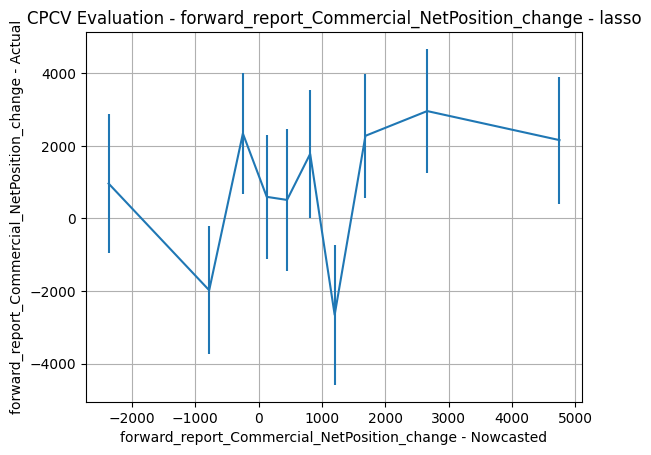

ridge: score=0.0545, params={'model': 'ridge', 'alpha': 509.2222138472398}
{'alpha': 509.2222138472398}


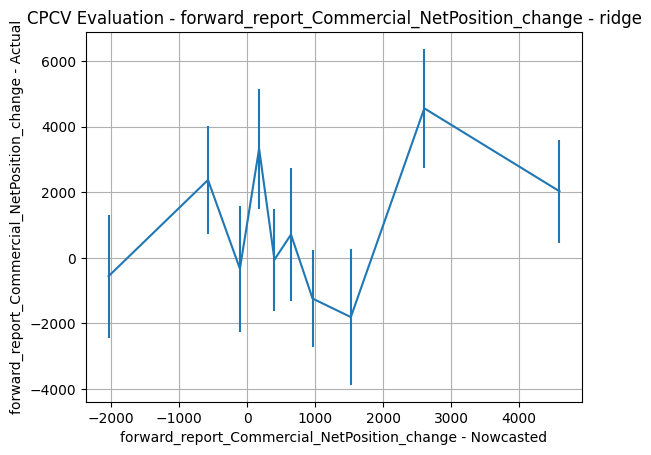

rf: score=0.0654, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


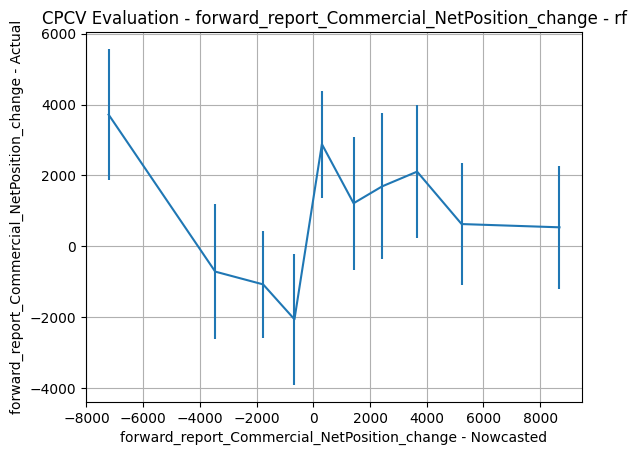

hgbm: score=0.0213, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
{'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}


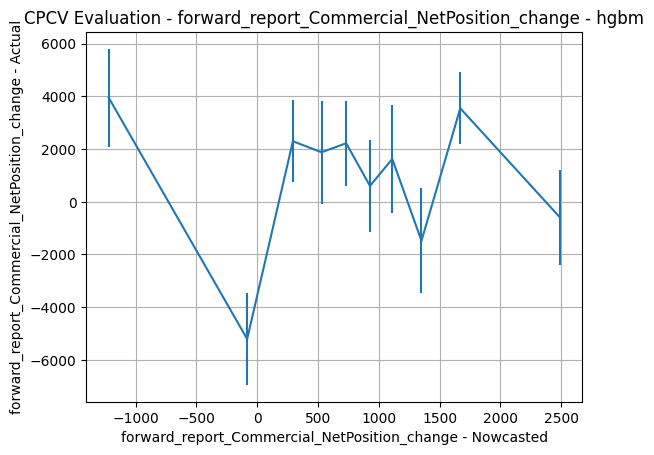

ols: score=0.0635, params={'model': 'ols'}
{}


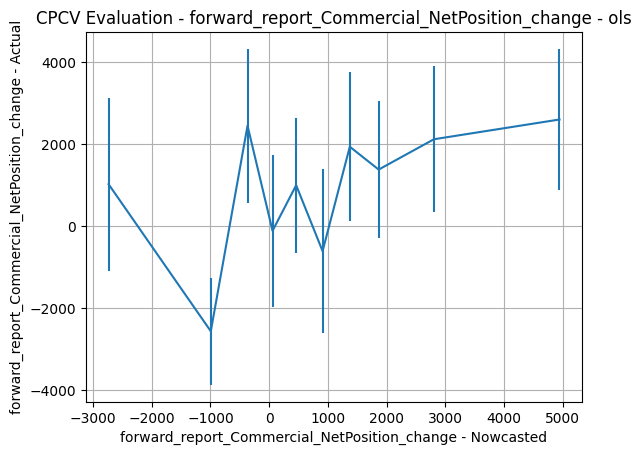

enet: score=-0.0964, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


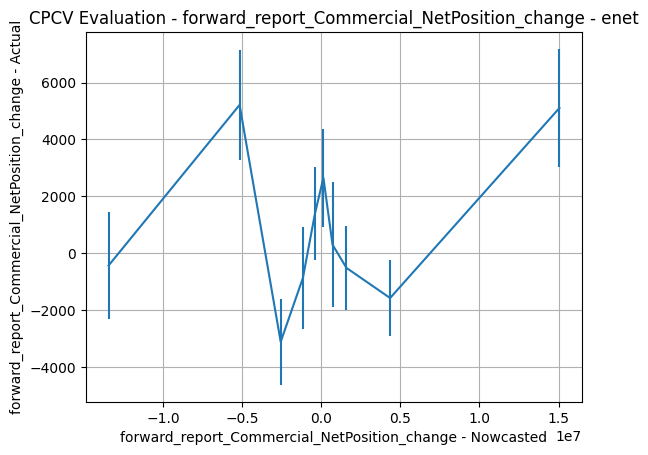

extra: score=0.0262, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}


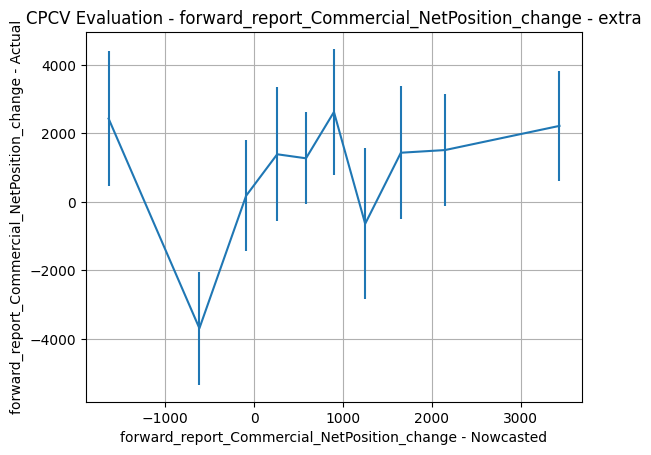

forward_report_CommercialLongPosition_change
lasso: score=0.3056, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
{'alpha': 8.357633562224205e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+08, tolerance: 6.483e+07
  model = cd_fast.enet_coordinate_descent(


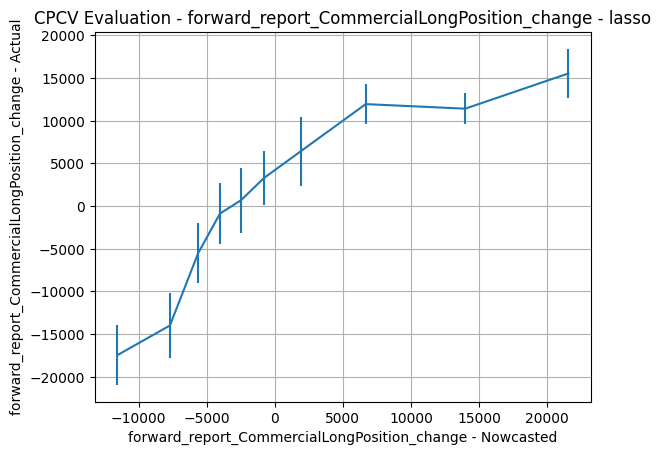

ridge: score=0.3046, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


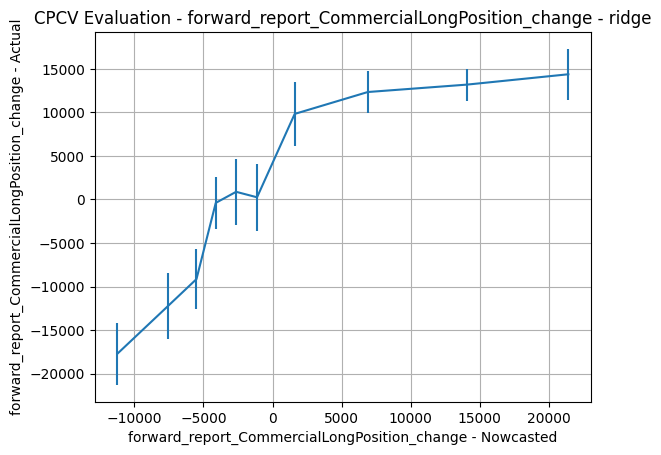

rf: score=0.4024, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


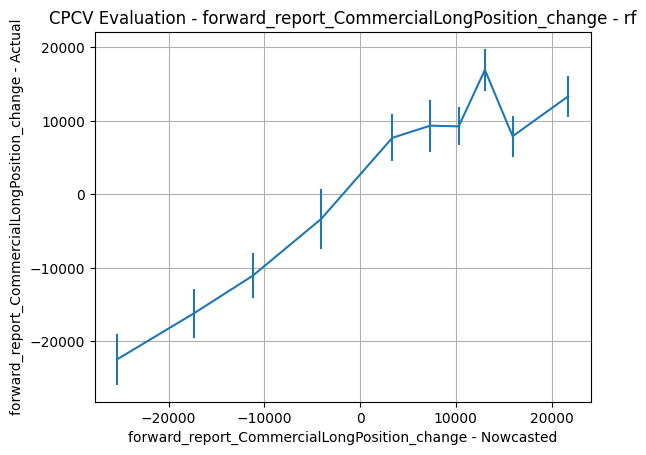

hgbm: score=0.3073, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


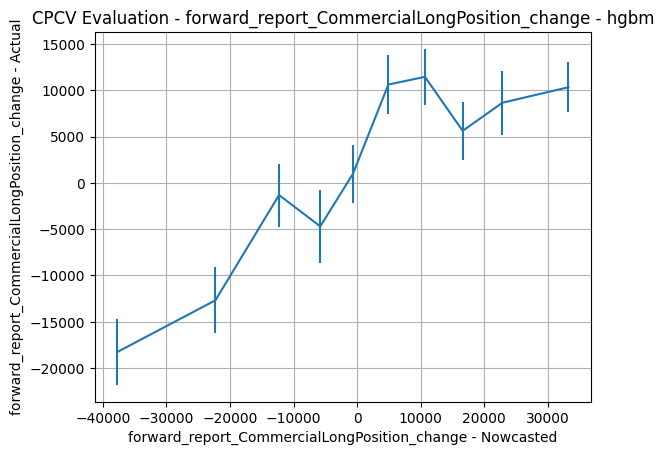

ols: score=0.3056, params={'model': 'ols'}
{}


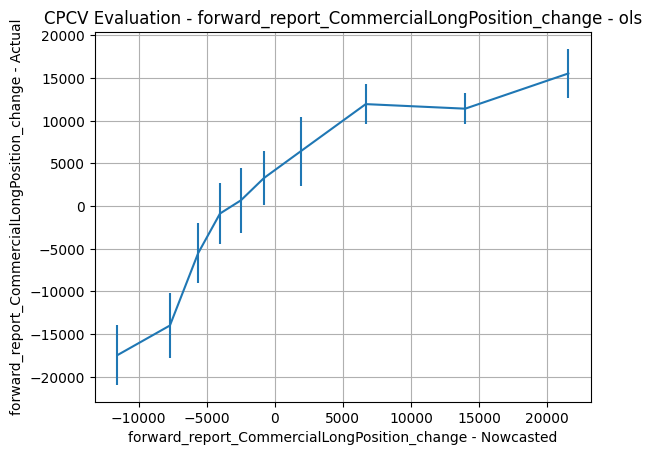

enet: score=0.3004, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


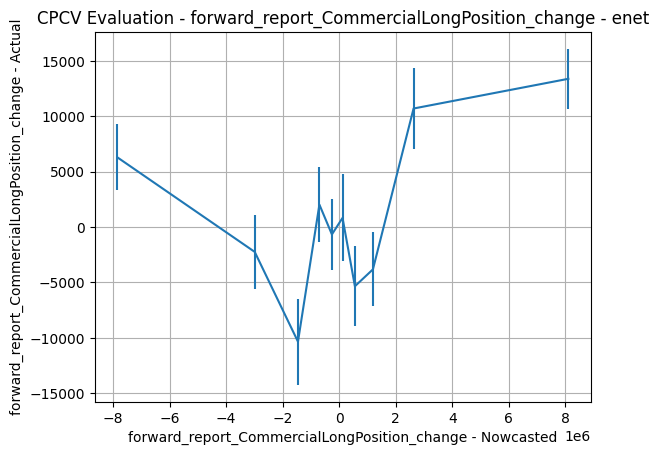

extra: score=0.3789, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


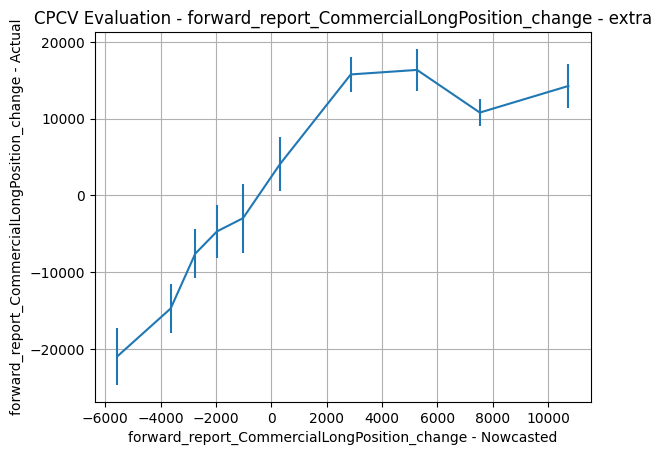

forward_report_CommercialShortPosition_change
lasso: score=0.2786, params={'model': 'lasso', 'alpha': 8.357633562224205e-06}
{'alpha': 8.357633562224205e-06}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.796e+09, tolerance: 5.674e+07
  model = cd_fast.enet_coordinate_descent(


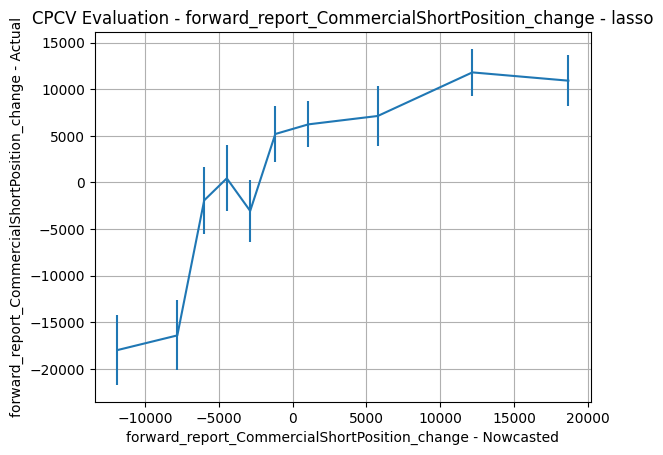

ridge: score=0.2761, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


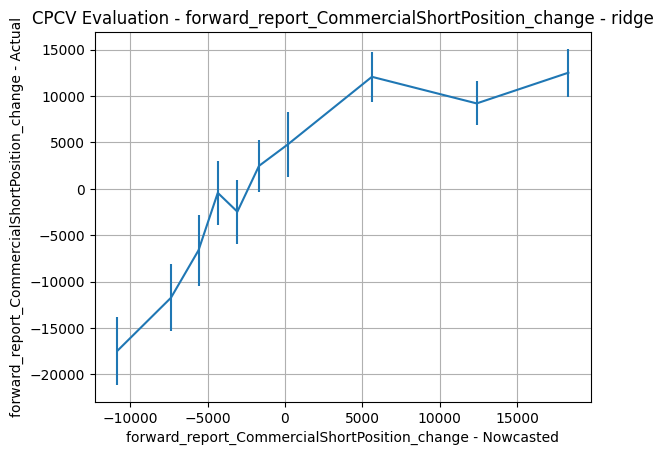

rf: score=0.4099, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


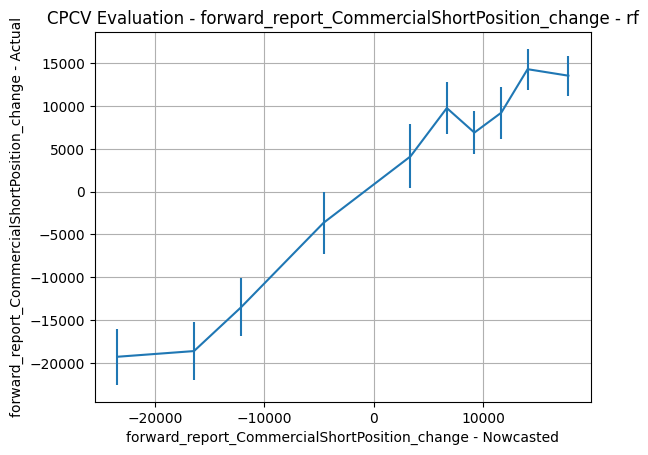

hgbm: score=0.2985, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


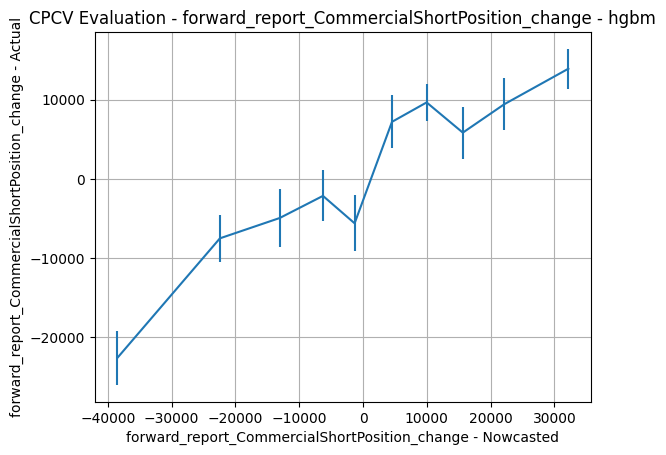

ols: score=0.2786, params={'model': 'ols'}
{}


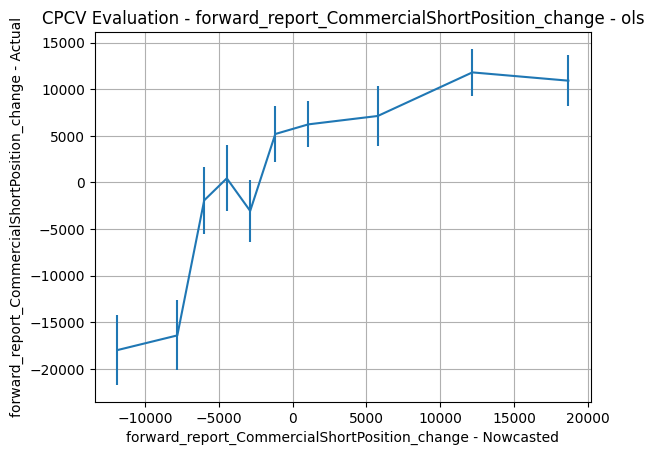

enet: score=0.2254, params={'model': 'enet', 'alpha': 1.6017436684365939e-06, 'l1_ratio': 0.6105443519032436, 'loss': 'huber', 'epsilon': 0.15537787171390066}
{'alpha': 1.6017436684365939e-06, 'l1_ratio': 0.6105443519032436, 'loss': 'huber', 'epsilon': 0.15537787171390066}


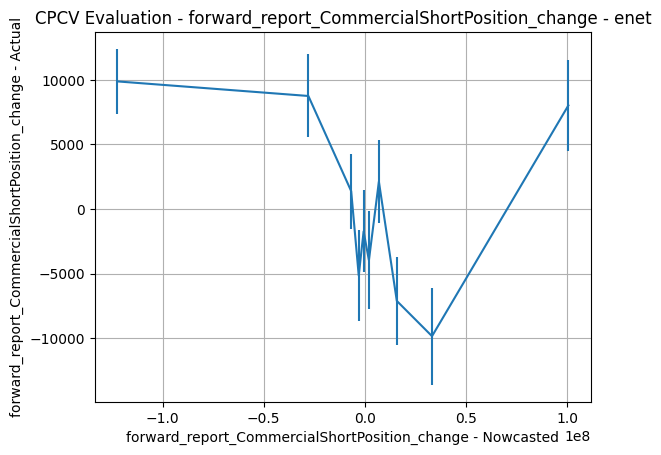

extra: score=0.3509, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


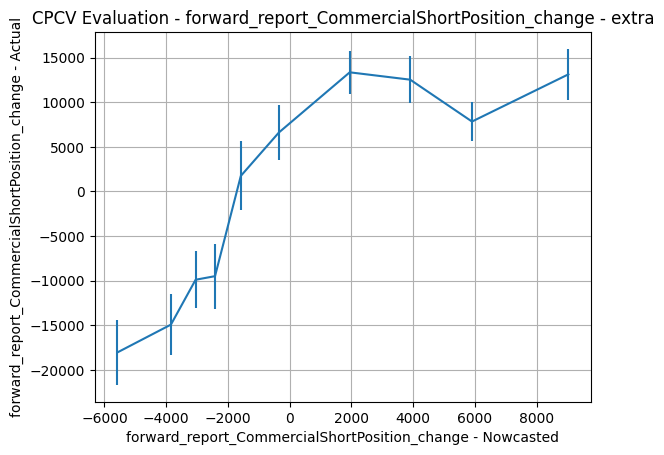

forward_Commercial_NetPosition_to_openinterest_change
lasso: score=-0.1223, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


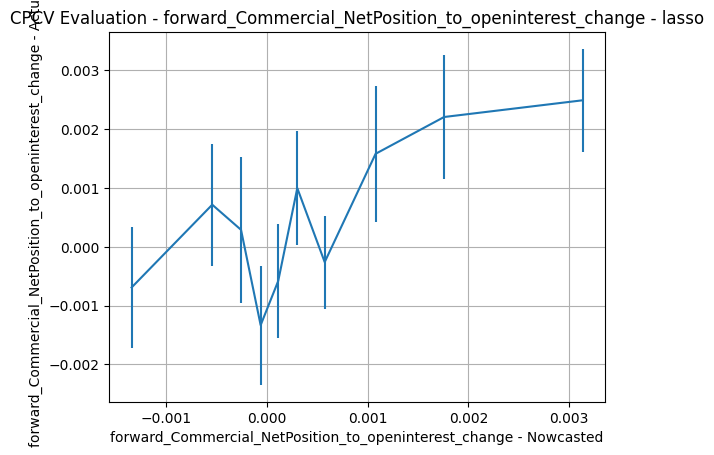

ridge: score=0.0677, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


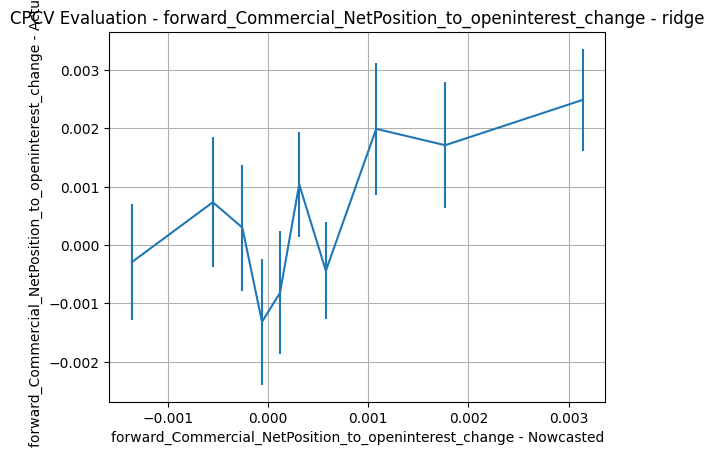

rf: score=0.1281, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


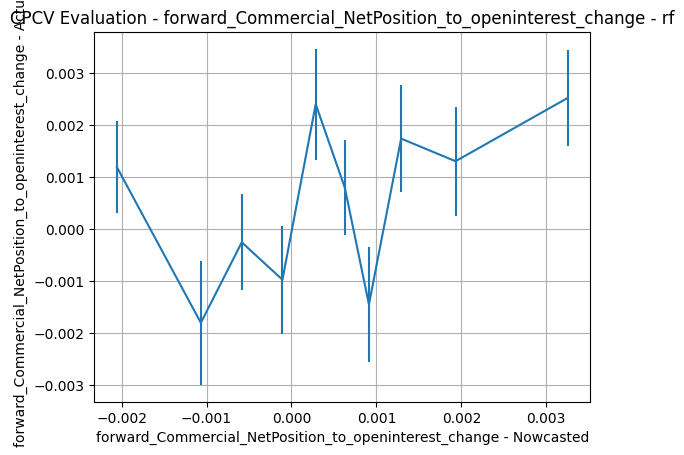

hgbm: score=0.0948, params={'model': 'hgbm', 'learning_rate': 0.14191432081077868, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}
{'learning_rate': 0.14191432081077868, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.0014350450428439743, 'max_leaf_nodes': 179}


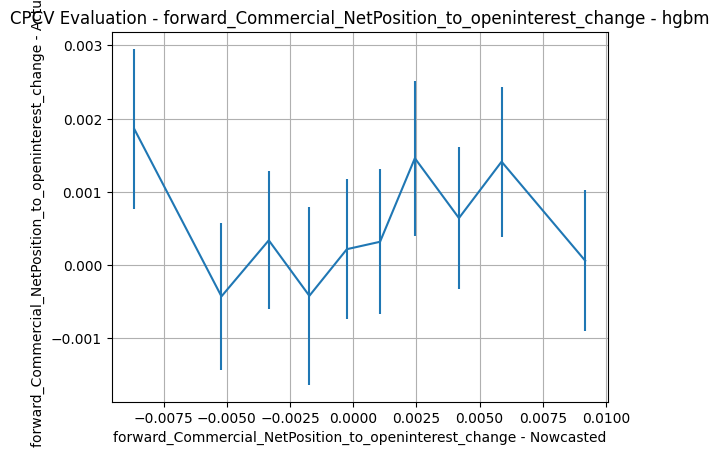

ols: score=0.0857, params={'model': 'ols'}
{}


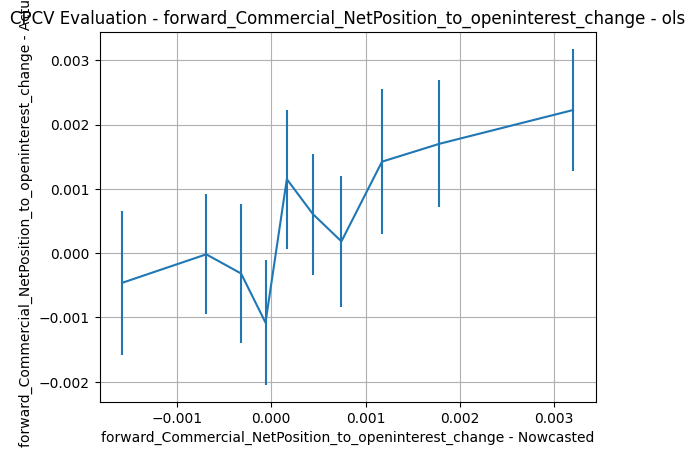

enet: score=-0.1181, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


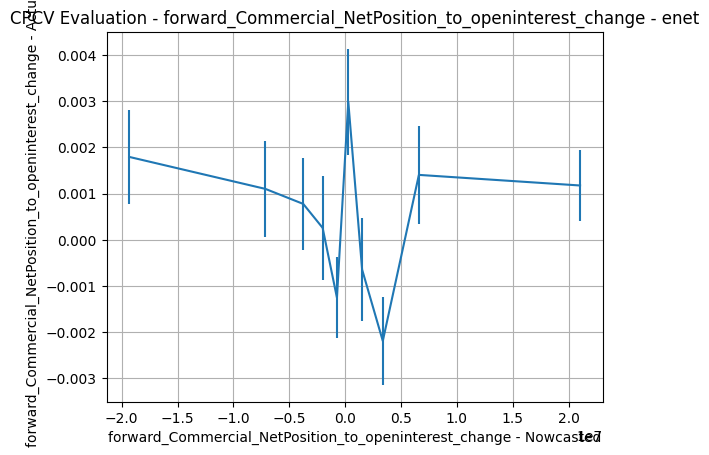

extra: score=0.0922, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}


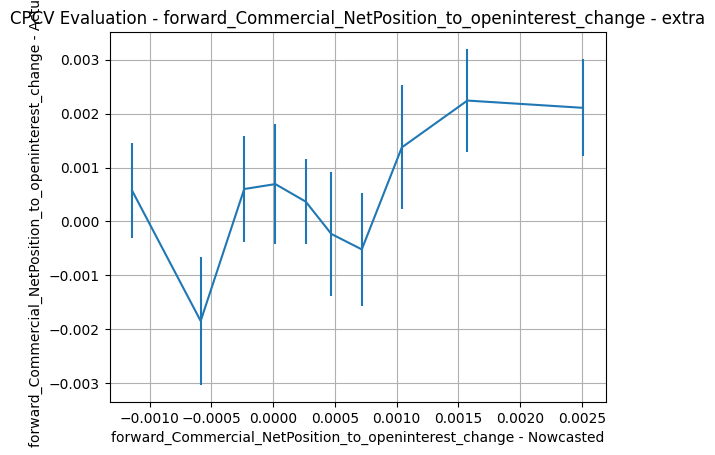

forward_CommercialLongPosition_to_openinterest_change
lasso: score=-0.0613, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


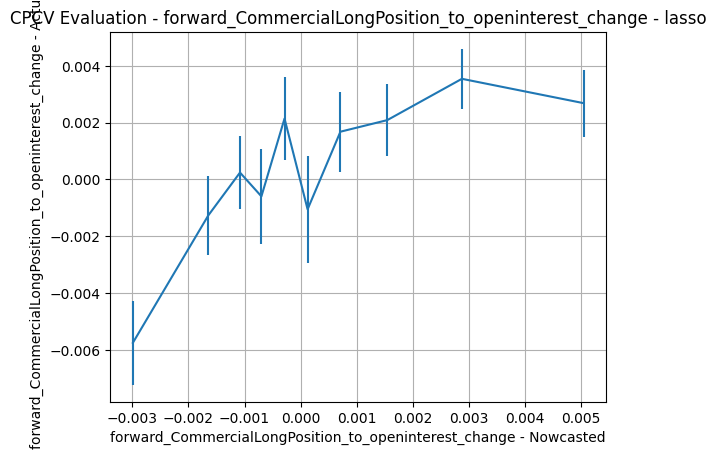

ridge: score=0.1496, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.1248e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.16359e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.17609e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.60031e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overw

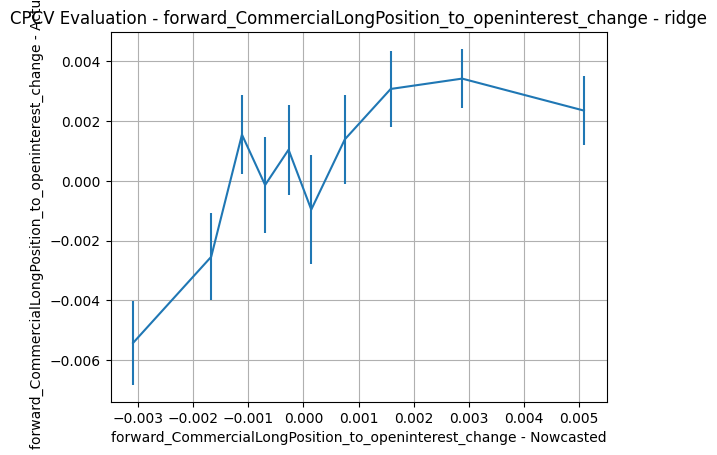

rf: score=0.2425, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}


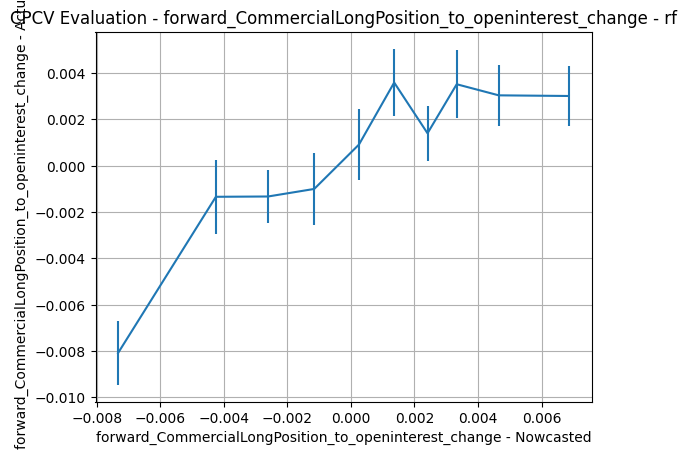

hgbm: score=0.1105, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


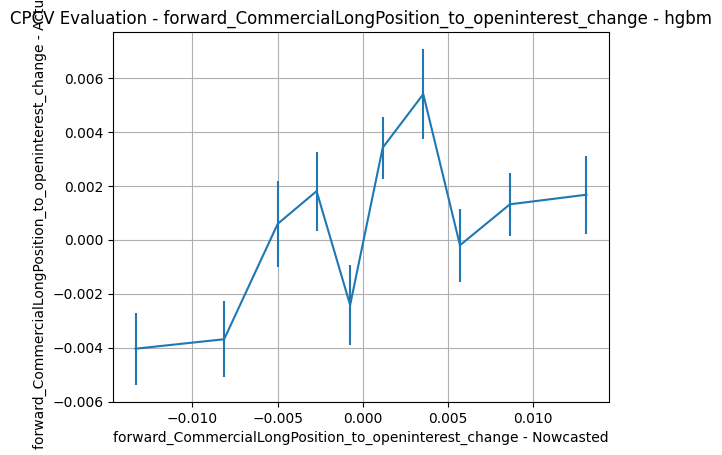

ols: score=0.1496, params={'model': 'ols'}
{}


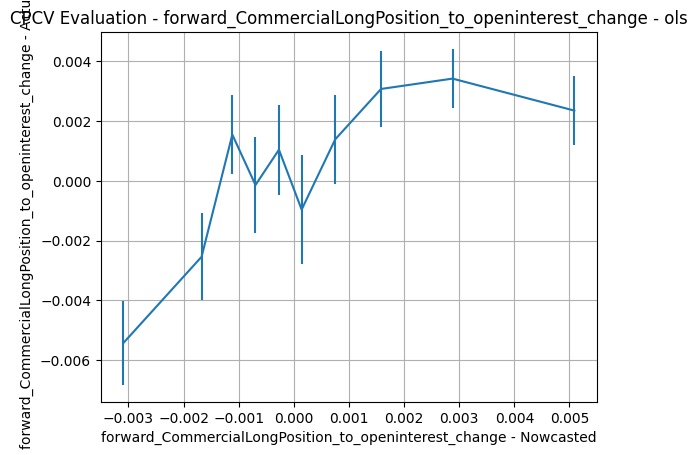

enet: score=-0.0631, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


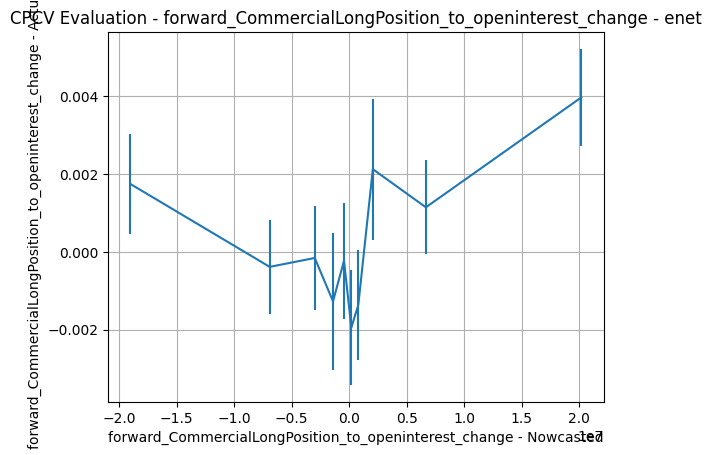

extra: score=0.1938, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


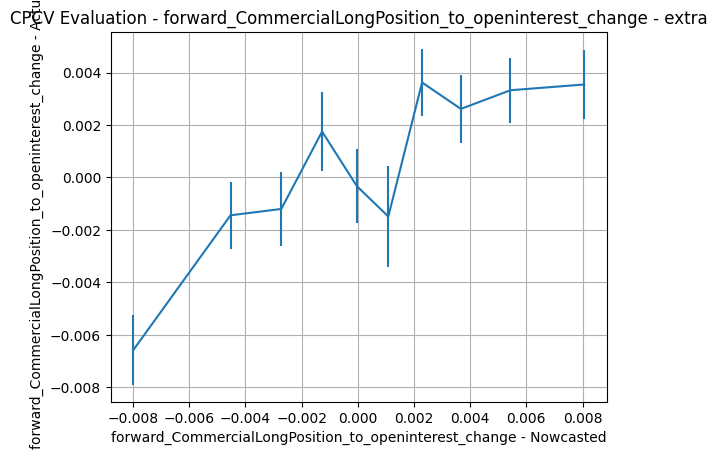

forward_CommercialShortPosition_to_openinterest_change
lasso: score=-0.0641, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


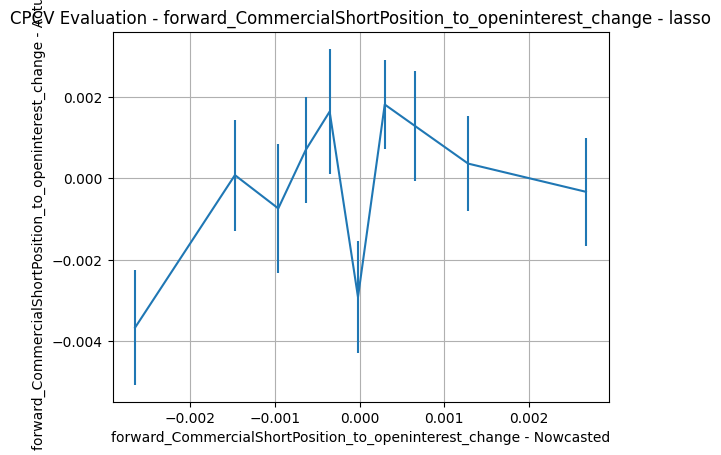

ridge: score=0.0722, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


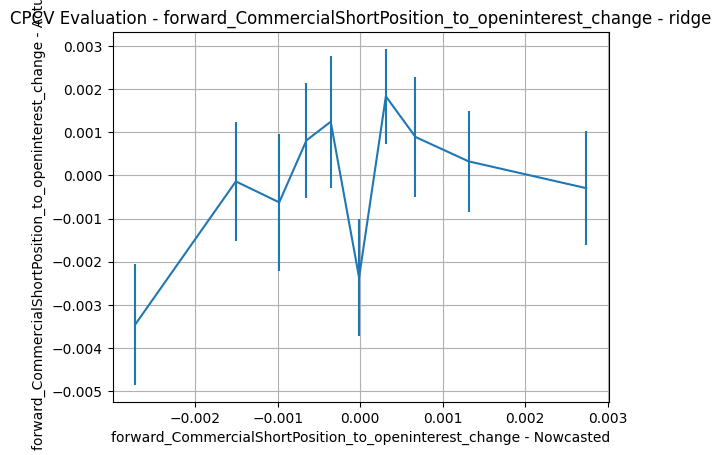

rf: score=0.2243, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}


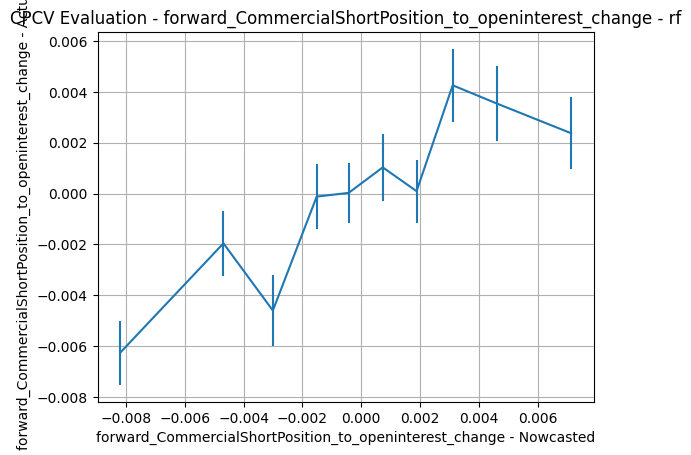

hgbm: score=0.1980, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


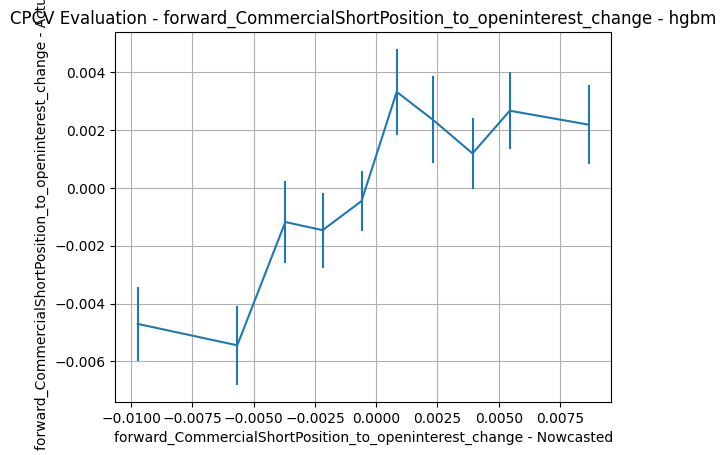

ols: score=0.0838, params={'model': 'ols'}
{}


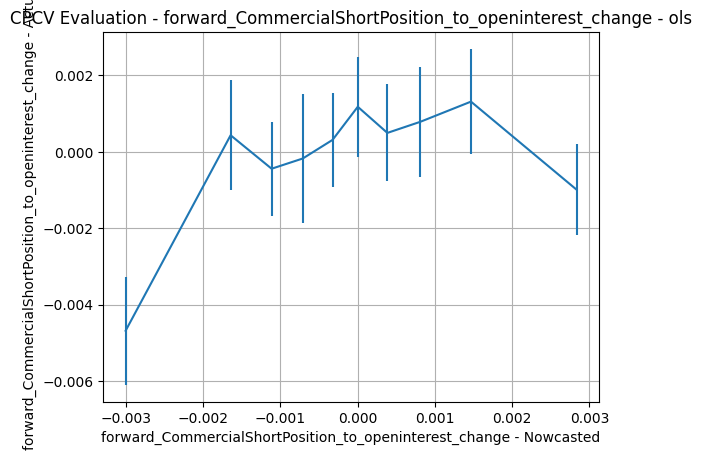

enet: score=-0.0538, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


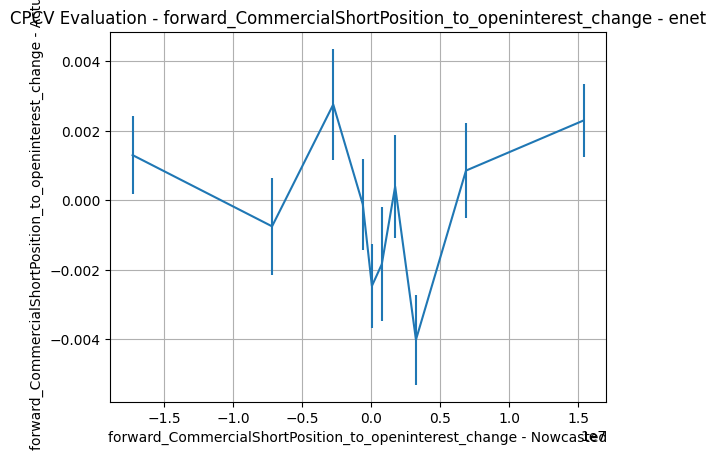

extra: score=0.2056, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


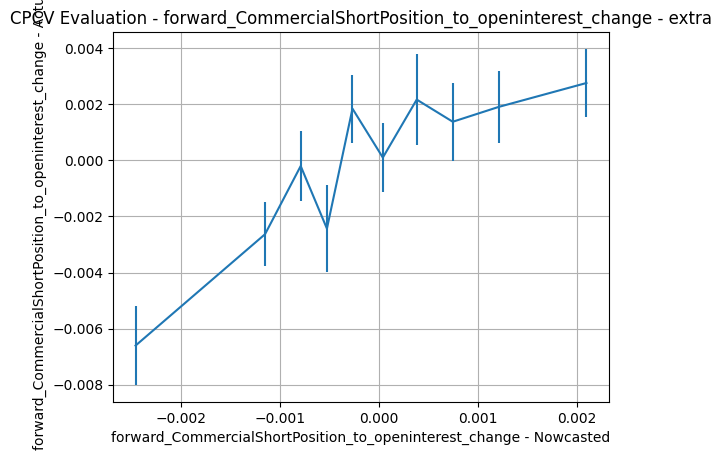

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_Commercial_NetPosition_change,0.040535,0.034409,-0.025070,-0.025790,0.048286,0.077455,0.025732
forward_report_CommercialLongPosition_change,0.305992,0.309321,0.392755,0.292166,0.305992,0.085316,0.364553
forward_report_CommercialShortPosition_change,0.287964,0.283393,0.416529,0.319989,0.287964,-0.069160,0.336832
forward_Commercial_NetPosition_to_openinterest_change,0.086319,0.084871,0.064249,-0.008013,0.090285,-0.014939,0.078912
forward_CommercialLongPosition_to_openinterest_change,0.157927,0.152605,0.227707,0.135471,0.152601,0.043369,0.207715
forward_CommercialShortPosition_to_openinterest_change,0.082099,0.083035,0.222912,0.198033,0.083834,0.001200,0.207129
